### Background and Context


AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

Based on last year's experience when the bank ran a campaign for liability customers to take a personal loan and the  conversion rate of over 9% success was achieved. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To build a model that will help marketing department to predict whether a liability customer will buy a personal loan or not.

1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant in the identification of a liability customer to take a personal loan.
3. Which segment of customers should be targeted more.

### Dataset

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Loading Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn import metrics
import matplotlib.pyplot as plt

# Libaries to help with data visualization
%matplotlib inline 
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, f1_score
from sklearn.model_selection import GridSearchCV

### Loading Data

In [2]:
loanModeldf = pd.read_csv("D:\\course\\LOAN_MODELLING.csv")
print(f'There are {loanModeldf.shape[0]} rows and {loanModeldf.shape[1]} columns.')  # f-string


np.random.seed(2) # setting the random seed via np.random.seed to get the same random result
loanModeldf.sample(n=10) # 10 random rows

There are 5000 rows and 14 columns.


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3566,3567,57,33,80,92064,2,2.8,1,0,0,0,0,1,1
4252,4253,54,29,81,91107,1,0.1,3,0,0,0,0,0,0
1918,1919,39,9,118,93555,2,6.0,3,246,1,0,1,1,1
4111,4112,43,17,21,95351,3,1.5,1,0,0,0,0,0,0
1471,1472,52,26,180,94305,1,1.0,1,0,0,0,0,1,1
929,930,55,30,22,92121,1,1.5,2,91,0,0,0,0,1
1916,1917,57,32,64,95138,3,1.6,3,0,0,0,0,1,0
3995,3996,53,28,34,92697,2,0.6,3,0,0,0,0,1,1
1130,1131,58,32,191,94402,1,2.9,1,0,0,0,0,0,0
1723,1724,39,15,55,95821,1,1.5,3,0,0,0,0,1,0


In [3]:
# copying data to another variable to avoid any changes to original data
loanModelcpdf = loanModeldf.copy()

### Understand the shape of the dataset.

In [4]:
loanModeldf.shape

(5000, 14)

### Check the data types of the columns for the dataset.

In [5]:
loanModeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* All are numerical variables
* Dependent variable is the Personal_loan 
* Id, age, experience, Income, zipcode, family, Education, Mortgage, Securities_account,CD_account, Online, CreditCard are of integer type while CCAvg is float type variable.
* There are no missing values in the dataset.

### Summary of the dataset.

In [6]:
loanModeldf.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


* `age`: Average age of people in the dataset is 45 years, age has medium range from 23 to 67 years.
* `Experience`: The average experience in years is 20 years. 50% of the people have average experience. Miminum experience is -3 and maximum experience is 43 years. -3 looks like a data anomaly
* `Income`: The average income is 74 thousand. The income range is huge from 8 - 224 thousand.
* `ZIPCode`: The zip Codes are evenly distributed in 25th percentile, 50th percentile and 75th percentile
* `Family`: The average family size is 2. The minimum members in family are 1 and maximum 4. 
* `CCAvg`: There's a huge difference in the 75th percentile and maximum value of CCAvg indicating the presence of outliers.
* `Education`: The average education is Graduate, The 75th percentile and maximum values are Advanced/Professional.
* `Mortgage`: The average mortgage is 56 thousand. The range of mortgage is huge varying from 0 to maximum 635 thousand.
* `Personal_Loan`: 75th percentile of people did not take a personal loan. 
* `Securities_Account`: 75th percentile of people do not have a securities account. 
* `CD_Account`: 75th percentile of people do not have a CD account.
* `Online`: 25th percentile of people do use online banking facilities.
* `CreditCard`: 50th percentile of people do not have a credit card.

## Data Pre-processing

In [7]:
for i in loanModeldf.describe().columns:
    print('Unique values in',i, 'are :')
    print(loanModeldf[i].value_counts())
    print('*'*50)

Unique values in ID are :
2047    1
2608    1
4647    1
2600    1
553     1
       ..
3263    1
1218    1
3267    1
1222    1
2049    1
Name: ID, Length: 5000, dtype: int64
**************************************************
Unique values in Age are :
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64
**************************************************
Unique values in Experience are :
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27

In [8]:
dfExp = loanModeldf.loc[loanModeldf['Experience'] >0]
dfExpNeg = loanModeldf.loc[loanModeldf['Experience'] < 0]
print(dfExp.mean())
print(dfExpNeg.count())

ID                     2496.172061
Age                      45.826506
Experience               20.605899
Income                   73.870750
ZIPCode               93167.386317
Family                    2.386112
CCAvg                     1.935412
Education                 1.874846
Mortgage                 56.844326
Personal_Loan             0.096887
Securities_Account        0.104056
CD_Account                0.061450
Online                    0.598730
CreditCard                0.294961
dtype: float64
ID                    52
Age                   52
Experience            52
Income                52
ZIPCode               52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal_Loan         52
Securities_Account    52
CD_Account            52
Online                52
CreditCard            52
dtype: int64


* We need to replace the rows having negative experience with mean experience of 21 years

In [9]:
negExp = loanModeldf.Experience < 0
mylist = loanModeldf.loc[negExp]['ID'].tolist()
print(mylist)

[90, 227, 316, 452, 525, 537, 541, 577, 584, 598, 650, 671, 687, 794, 890, 910, 1174, 1429, 1523, 1906, 2103, 2431, 2467, 2546, 2619, 2718, 2849, 2877, 2963, 2981, 3077, 3131, 3158, 3280, 3285, 3293, 3395, 3426, 3627, 3797, 3825, 3888, 3947, 4016, 4089, 4117, 4286, 4412, 4482, 4515, 4583, 4958]


In [10]:
for id in mylist:
    loanModeldf.loc[loanModeldf.loc[np.where(loanModeldf['ID']==id)].index, 'Experience'] = 21

In [11]:
# checking if there are records with negative experience
loanModeldf[loanModeldf['Experience'] < 0]['Experience'].count()

0

In [12]:
loanModeldf['Experience'].value_counts()

21    165
32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
24    131
3     129
14    127
16    127
30    126
34    125
27    125
17    125
22    124
29    124
7     121
15    119
6     119
8     119
10    118
13    117
33    117
37    116
11    116
36    114
4     113
31    104
12    102
38     88
39     85
2      85
1      74
0      66
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

## Univariate Analysis

In [13]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# The following function will  create a boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on Age

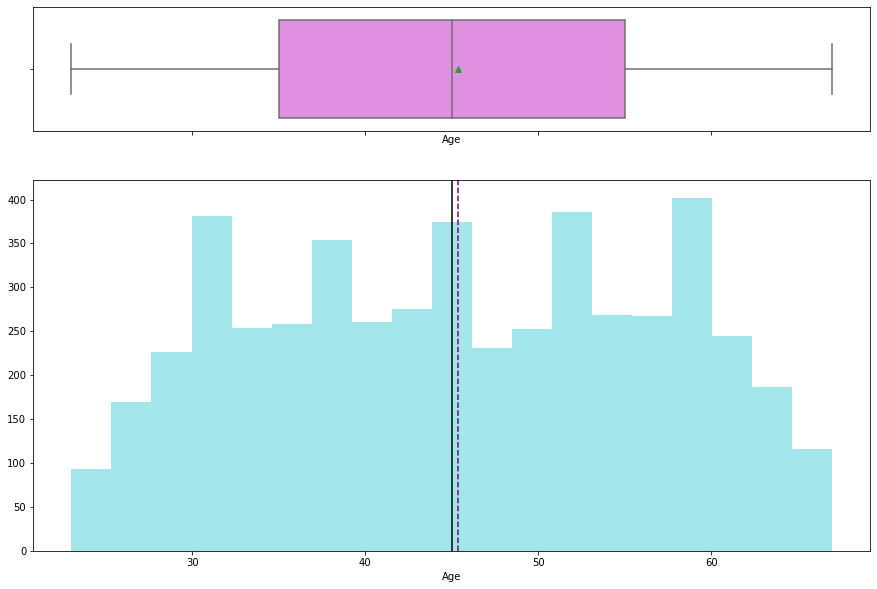

In [14]:
histogram_boxplot(loanModeldf.Age)

* Age is evenly distributed. 

### Observations on Experience

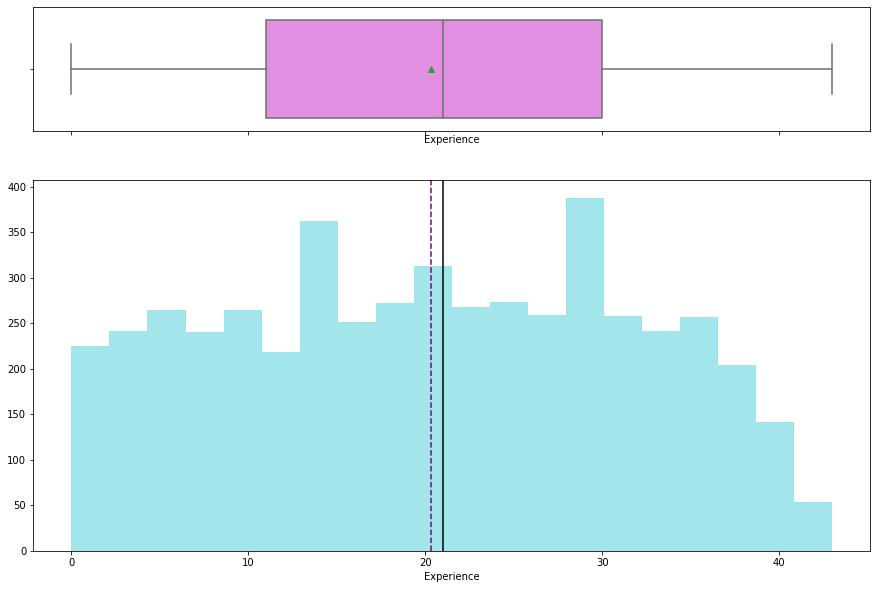

In [15]:
histogram_boxplot(loanModeldf.Experience)

* Experience is evenly distributed. 

### Observations on Income

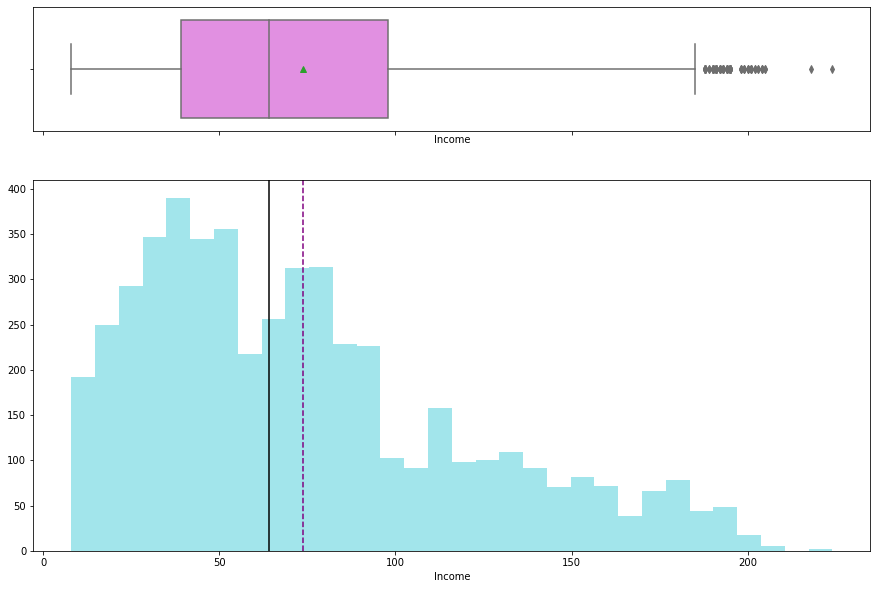

In [16]:
histogram_boxplot(loanModeldf.Income)

* Income is right skewed. Some outliers present.

### Observations on ZipCode

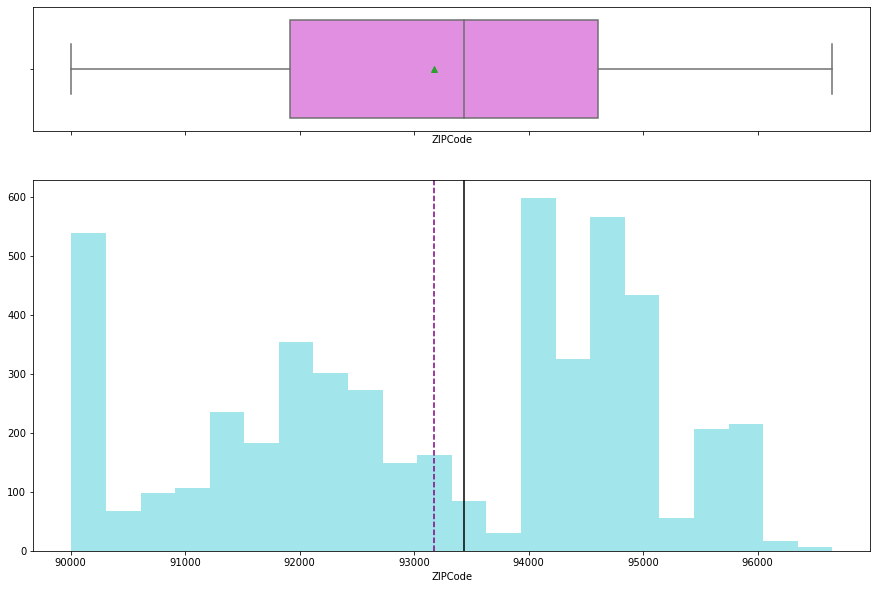

In [17]:
histogram_boxplot(loanModeldf.ZIPCode)

* ZipCode is fairly distributed.

### Observations on Family size

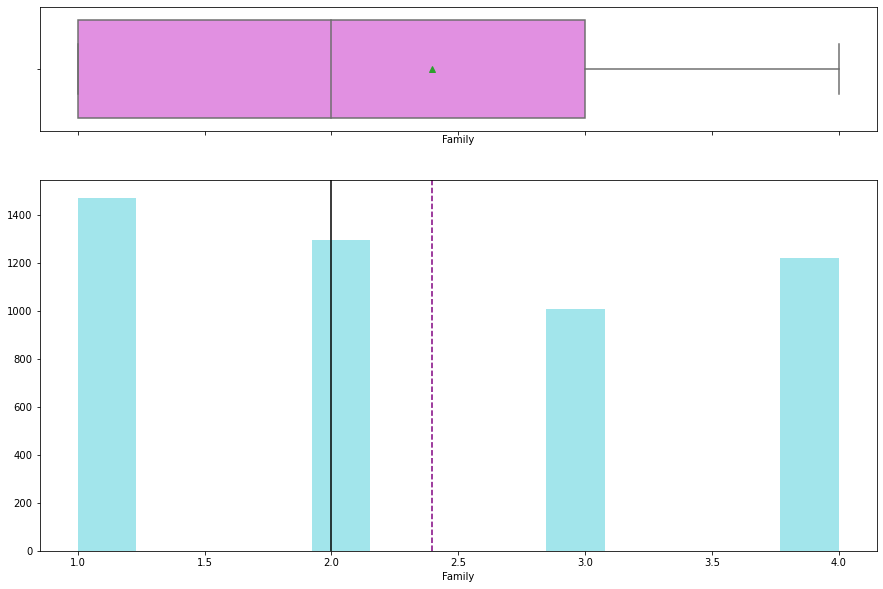

In [18]:
histogram_boxplot(loanModeldf.Family)

* Family is relatively evenly distributed.

### Observations on CCAvg

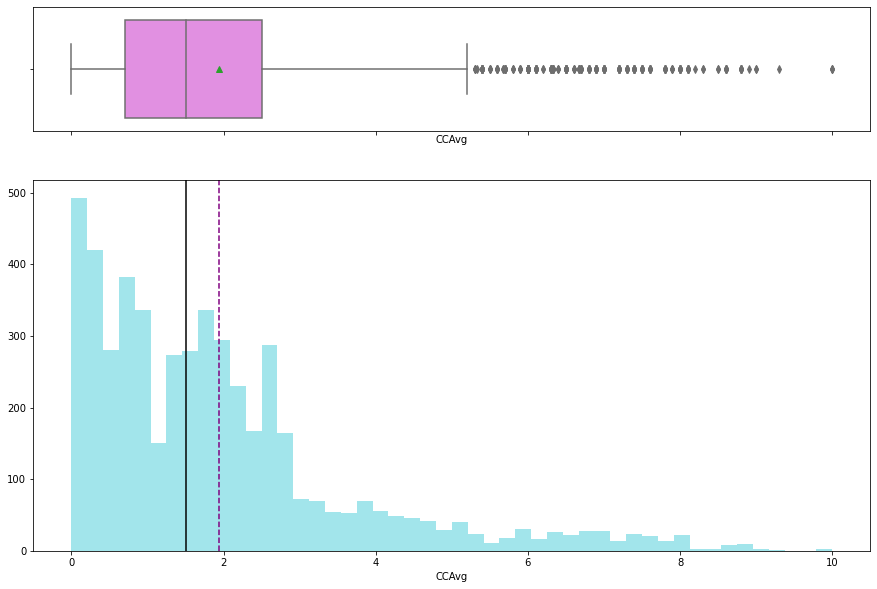

In [19]:
histogram_boxplot(loanModeldf.CCAvg)

* CCAvg is right skewed. Has some outliers.

### Observations on Education

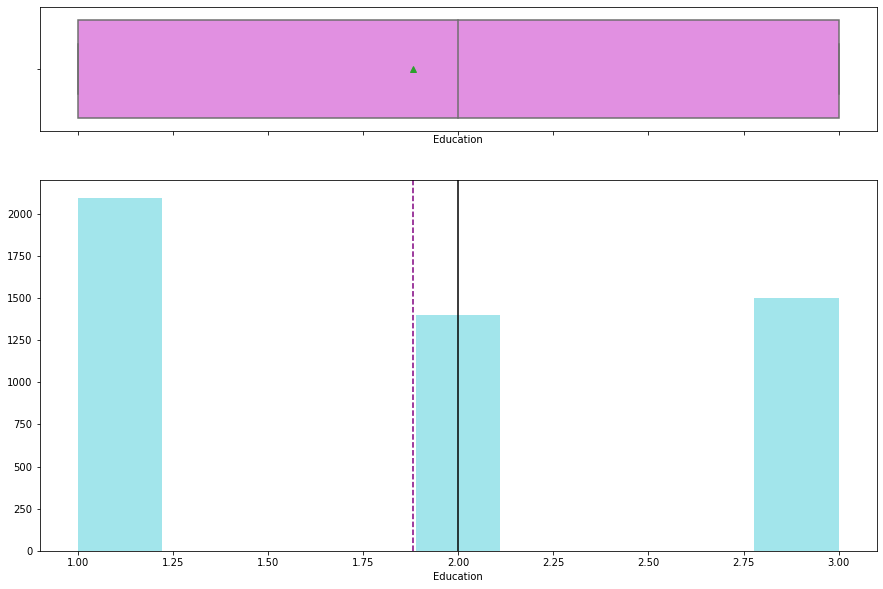

In [20]:
histogram_boxplot(loanModeldf.Education)

* Education is relatively fairly distributed.

### Observations on Mortgage

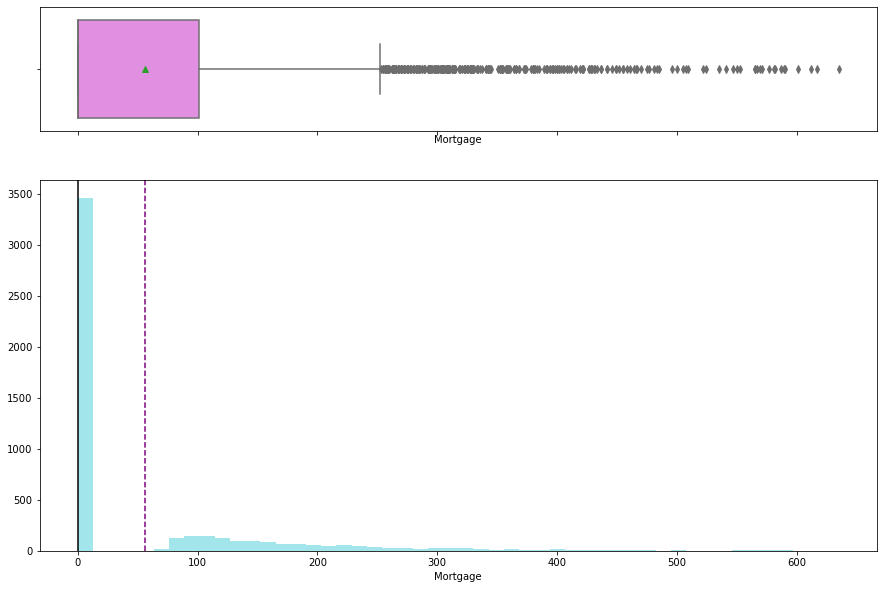

In [21]:
histogram_boxplot(loanModeldf.Mortgage)

* Mortgage is right skewed. Has quite a few outliers.

### Observations on Personal loan

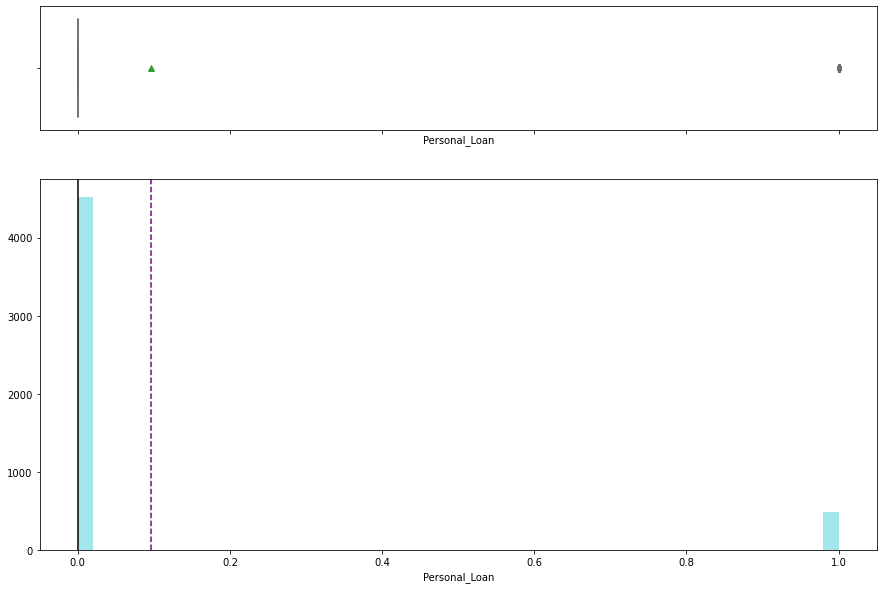

In [22]:
histogram_boxplot(loanModeldf.Personal_Loan)

* Personal loan has basically only two values yes or no and most of them are no.

### Observations on Securities Account

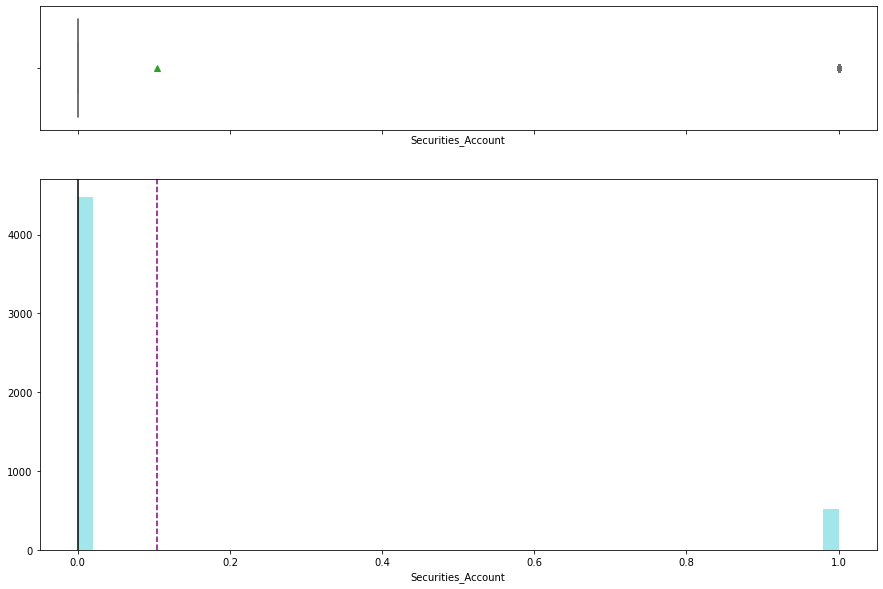

In [23]:
histogram_boxplot(loanModeldf.Securities_Account)

* Securities Account has basically only two values yes or no and most of them are no.

### Observations on Online

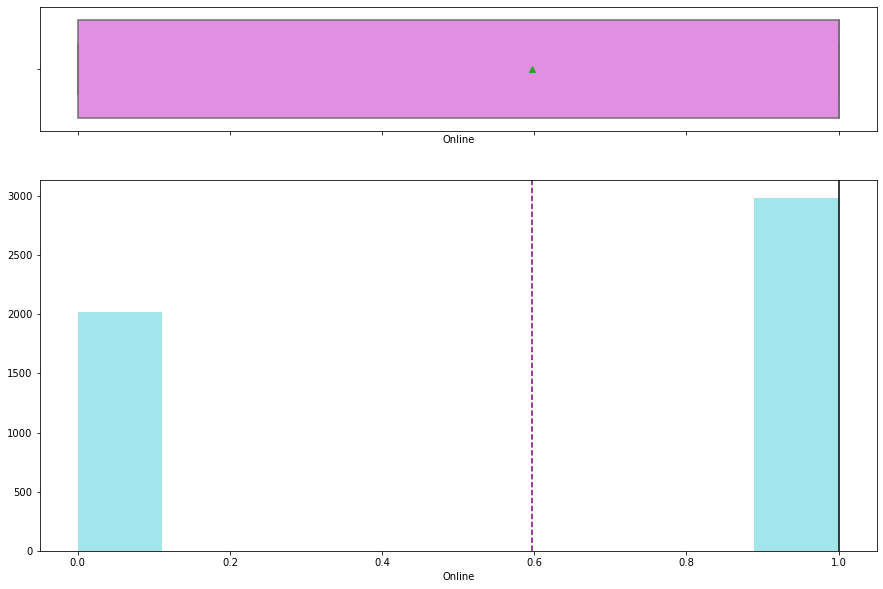

In [24]:
histogram_boxplot(loanModeldf.Online)

* Online usage has basically only two values yes or no and most of them are no. Its almost like a categorical variable.

### Observations on Credit card

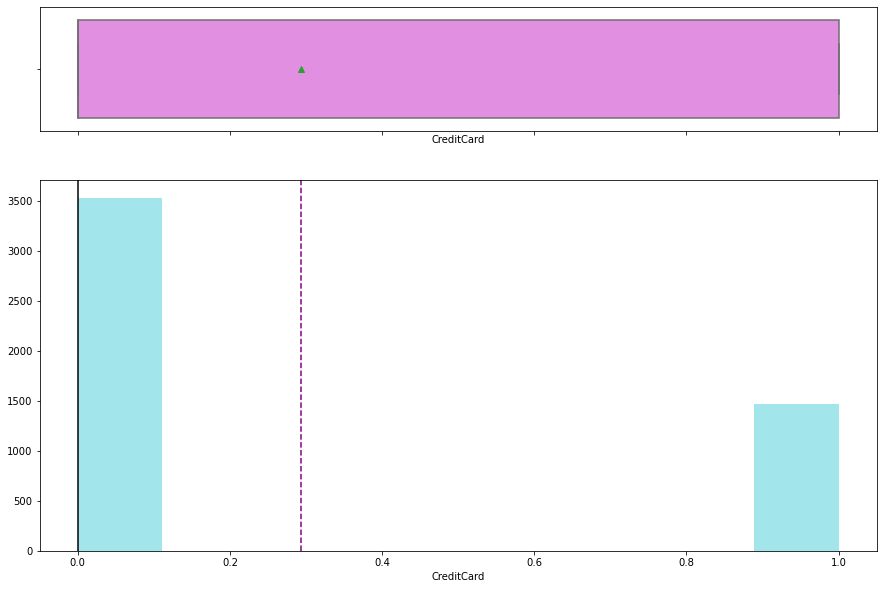

In [25]:
histogram_boxplot(loanModeldf.CreditCard)

* Credit card usage of another bank has basically only two values yes or no and most of them are no. Its almost like a categorical variable.

In [26]:
# Function to create barplots that indicate percentage for each category.
def percent_wise_bar(data, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=45)
    ax = sns.countplot(data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=10)  # annotate the percantage
    plt.show()  # show the plot

### Count Plot for Credit Card

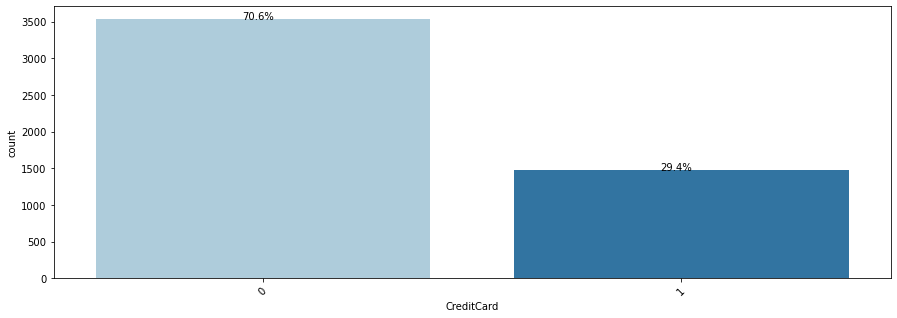

In [27]:
percent_wise_bar(loanModeldf, "CreditCard")

* 29% of customers use credit cards of other banks whereas 71% don't

### Count Plot for Online Use

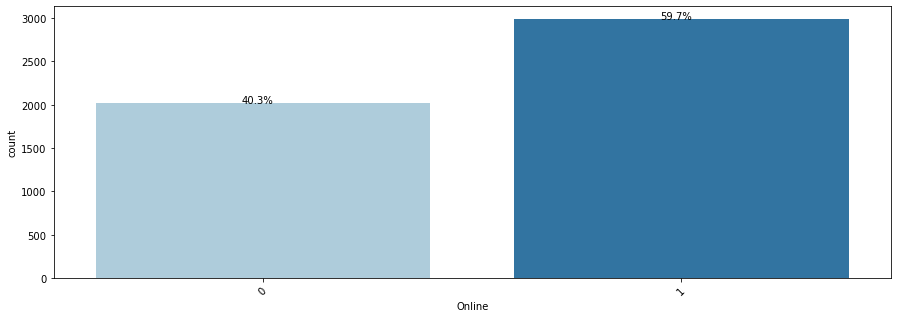

In [28]:
percent_wise_bar(loanModeldf, "Online")

* 60% of customers use online services, 40% don't

### Count Plot for Securities account

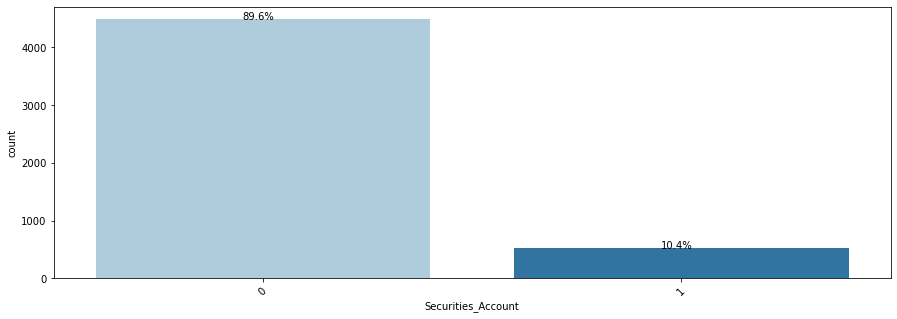

In [29]:
percent_wise_bar(loanModeldf, "Securities_Account")

* 60% of customers use online services, 40% don't use online services.

### Count Plot for Personal account in last campaign

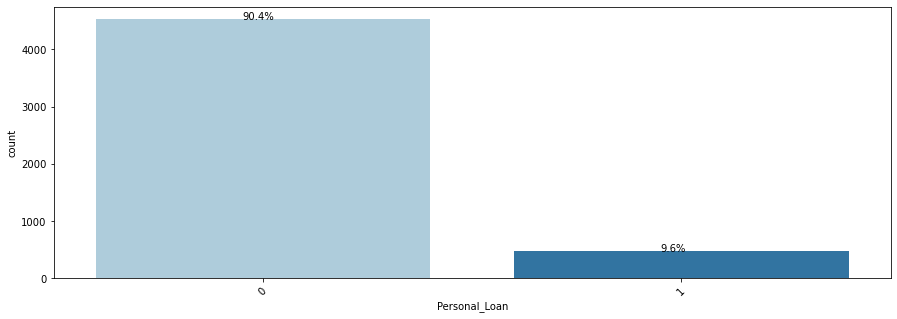

In [30]:
percent_wise_bar(loanModeldf, "Personal_Loan")

* 91% of customers did not take a personal loan, 9% only took in previous campaign.

### Count Plot for CD account

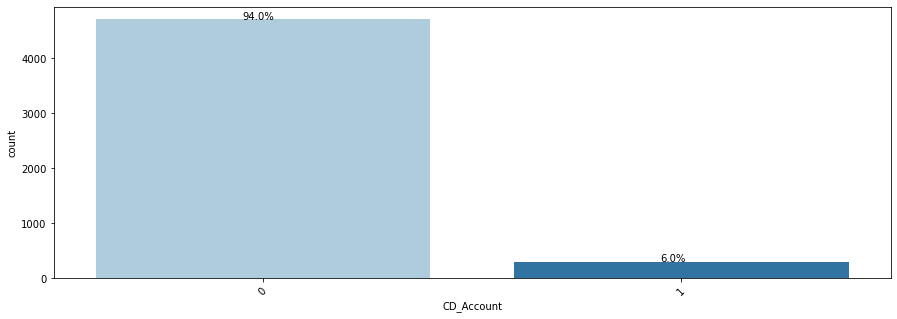

In [31]:
percent_wise_bar(loanModeldf, "CD_Account")

* 94% of customers did not have a CD account, 6% only took in previous campaign.

## Bivariate analysis

In [32]:
loanModeldf.corr() # It will show correlation matrix 

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000000,-0.008473,-0.009386,-0.017695,0.002240,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.975489,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009386,0.975489,1.000000,-0.049123,-0.030368,-0.045149,-0.048616,0.018289,-0.013482,-0.014314,-0.000432,0.005292,0.013422,0.008823
Income,-0.017695,-0.055269,-0.049123,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.002240,-0.030530,-0.030368,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.016797,-0.046418,-0.045149,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.048616,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.018289,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.013482,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.014314,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


* There is more instances of negative correlation between the columns.
* Age and Experience columns are strongly correlated.
* Personal loan has a weak correlation Age, experience, zipcode
* Personal loan has a relatively strong relation with income.It has relatively good corelations with Credit card spending and CD deposit account.

In [33]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

### Correlation matrix graphical representation

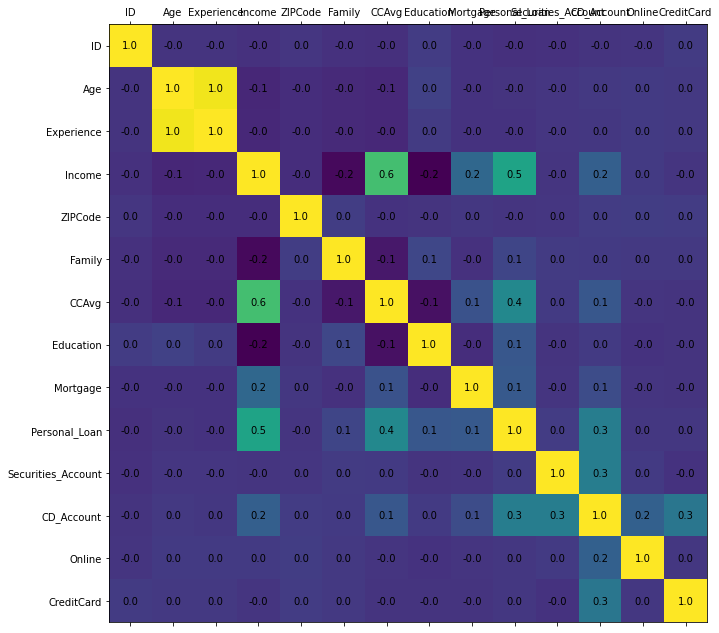

In [34]:
plot_corr(loanModeldf)

### PairPlots for attributes

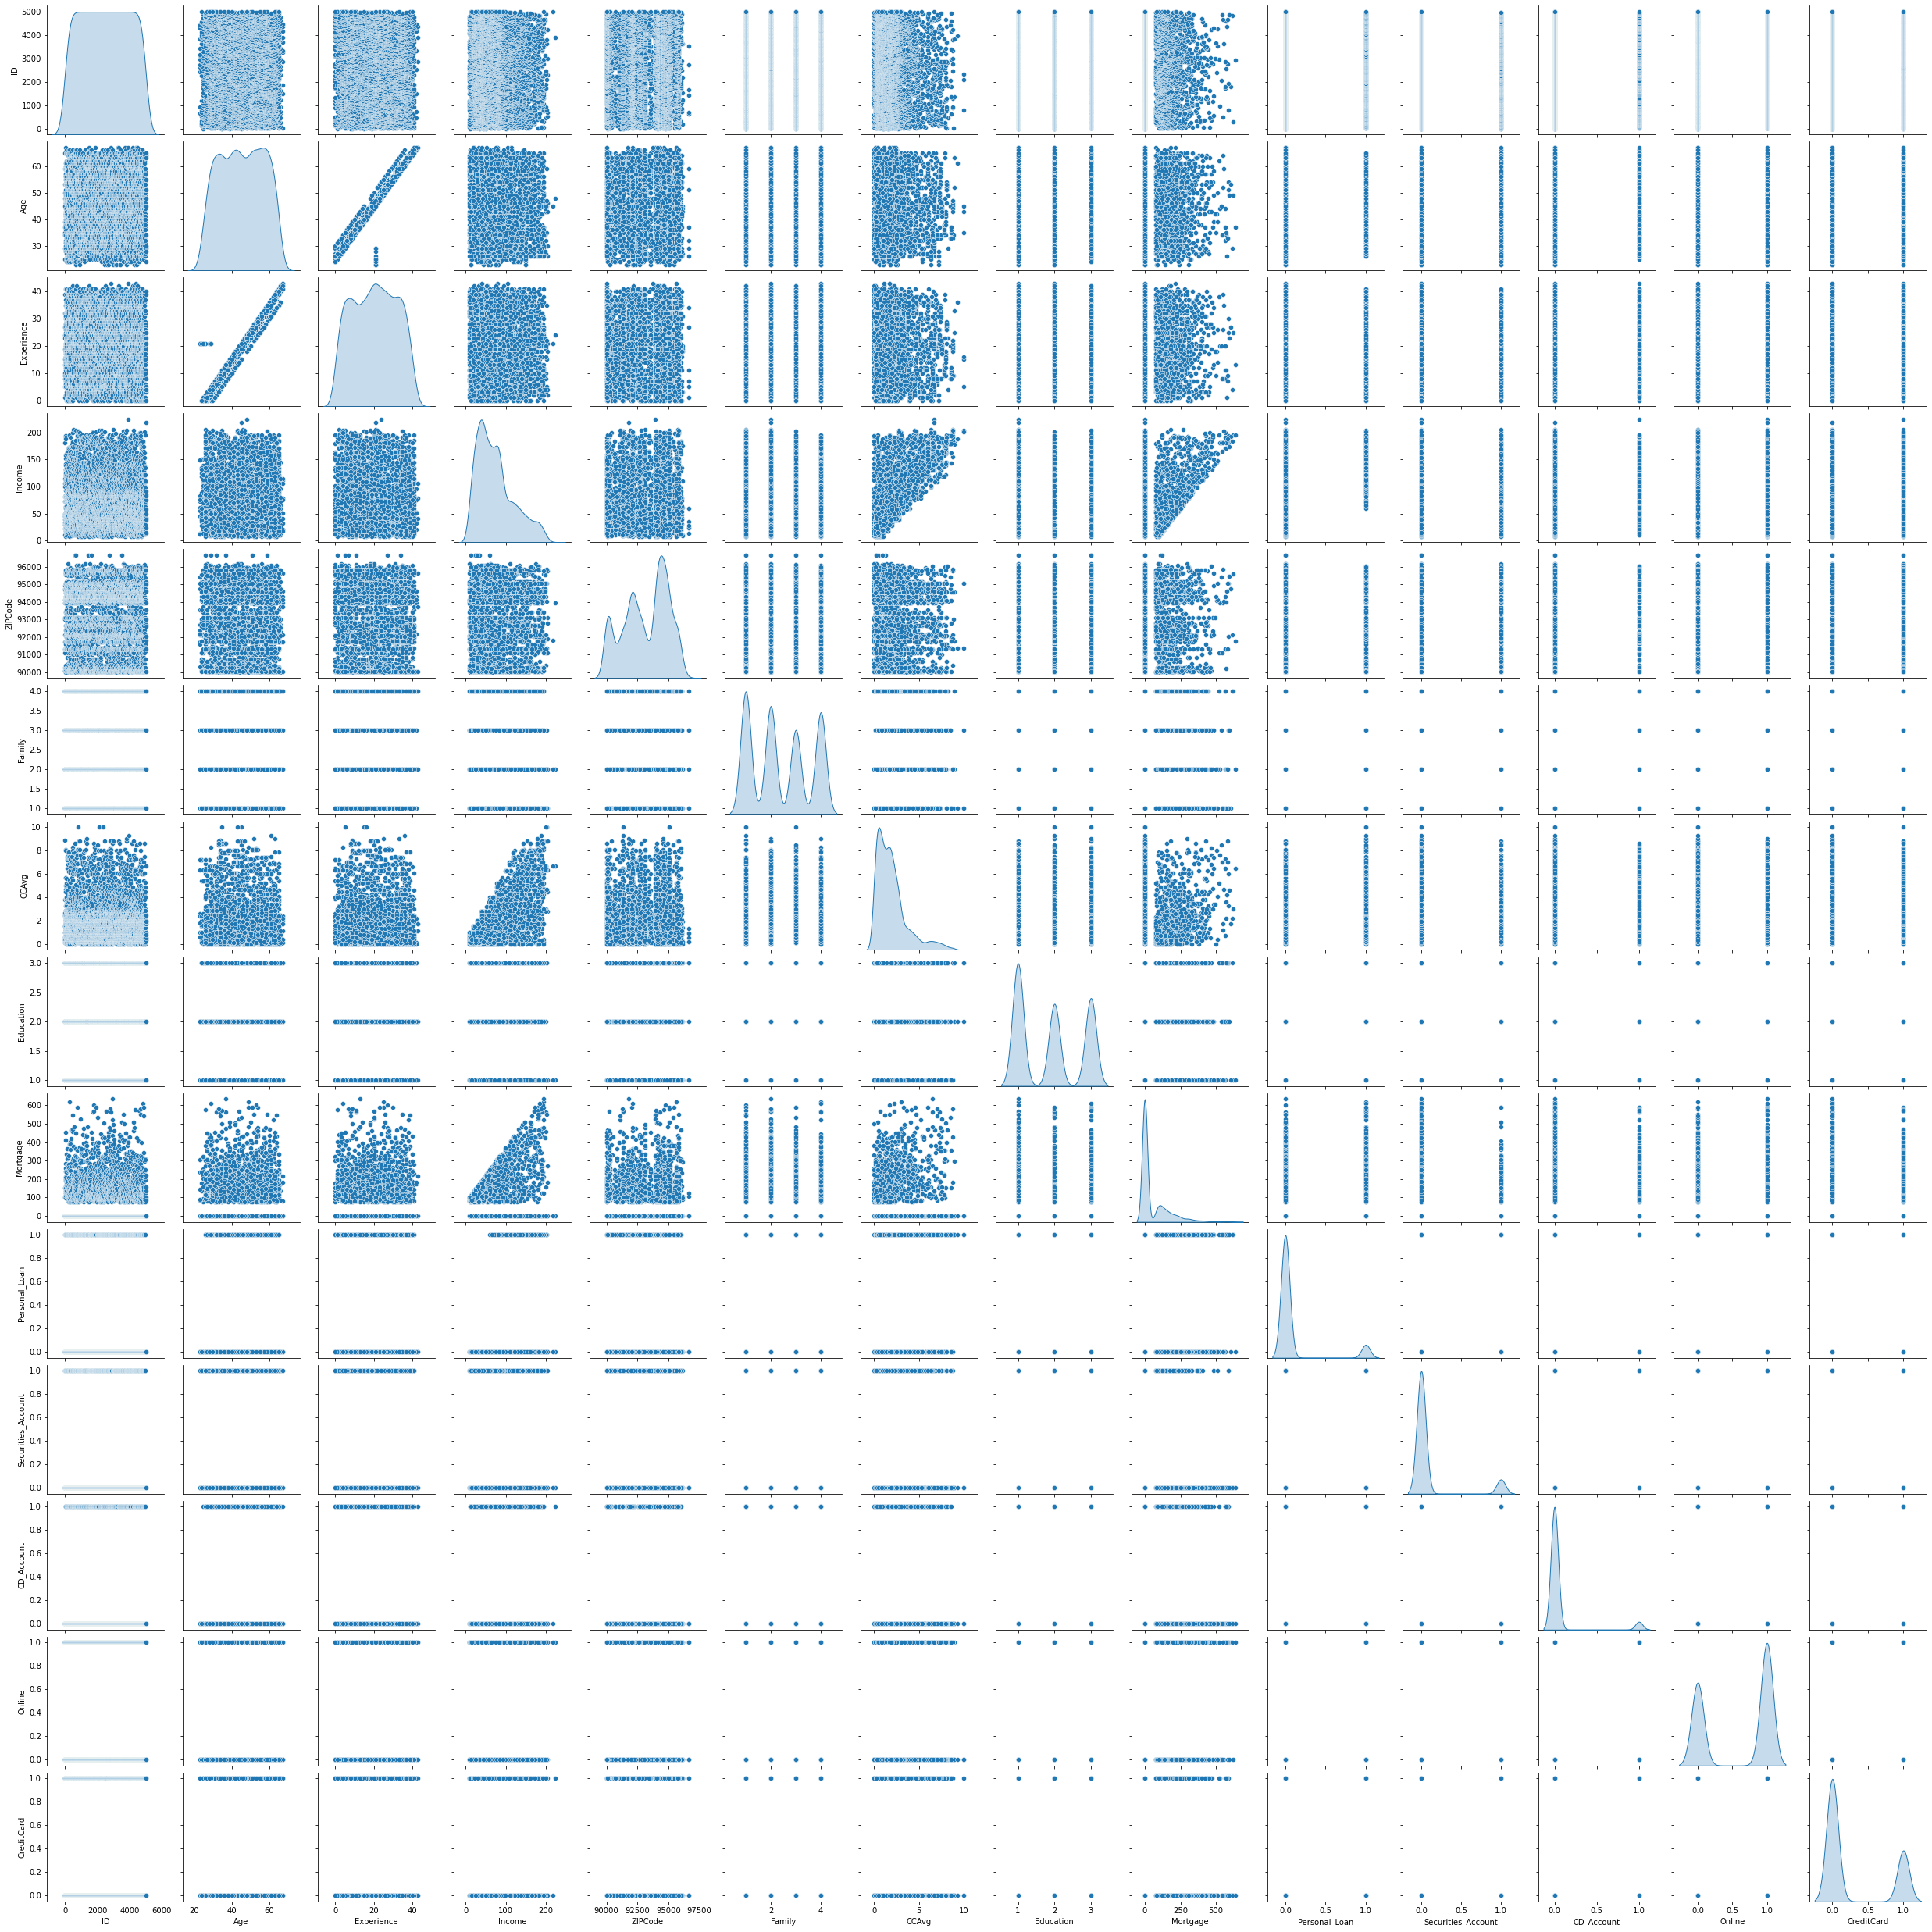

In [35]:
sns.pairplot(loanModeldf,diag_kind='kde')

In [36]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,loanModeldf['Personal_Loan'],margins=True)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,loanModeldf['Personal_Loan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

### Influence of income and education on personal loan

<AxesSubplot:xlabel='Education', ylabel='Income'>

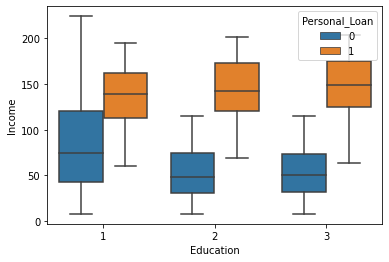

In [37]:
sns.boxplot(x='Education',y='Income',hue='Personal_Loan',data=loanModeldf)

* It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

### Education vs Personal Loan

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


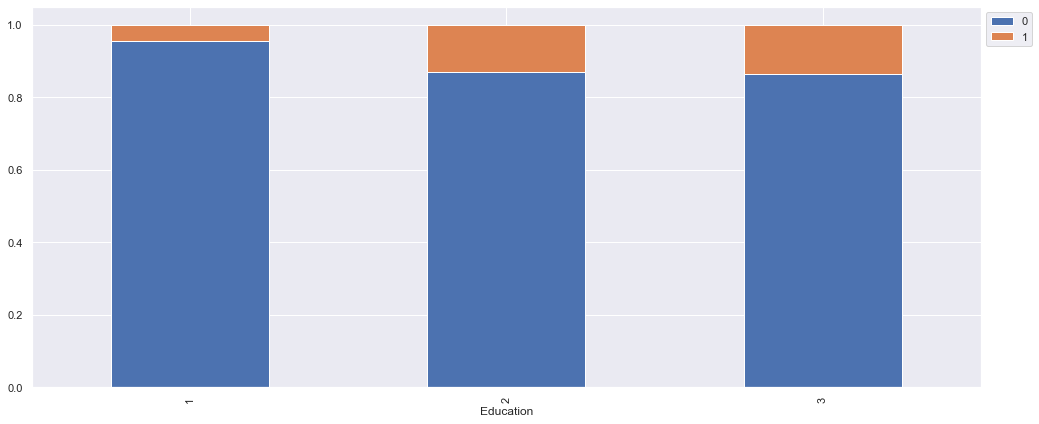

In [39]:
stacked_plot(loanModeldf['Education'])

* Only 4% of people with Education level 1 took a personal loan.
* 12-15% of people with Education level 2 and 3 took a personal loan

### Age vs Personal Loan

Personal_Loan     0    1   All
Age                           
23               12    0    12
24               28    0    28
25               53    0    53
26               65   13    78
27               79   12    91
28               94    9   103
29              108   15   123
30              119   17   136
31              118    7   125
32              108   12   120
33              105   15   120
34              116   18   134
35              135   16   151
36               91   16   107
37               98    8   106
38              103   12   115
39              127    6   133
40              117    8   125
41              128    8   136
42              112   14   126
43              134   15   149
44              107   14   121
45              114   13   127
46              114   13   127
47              103   10   113
48              106   12   118
49              105   10   115
50              125   13   138
51              119   10   129
52              130   15   145
53      

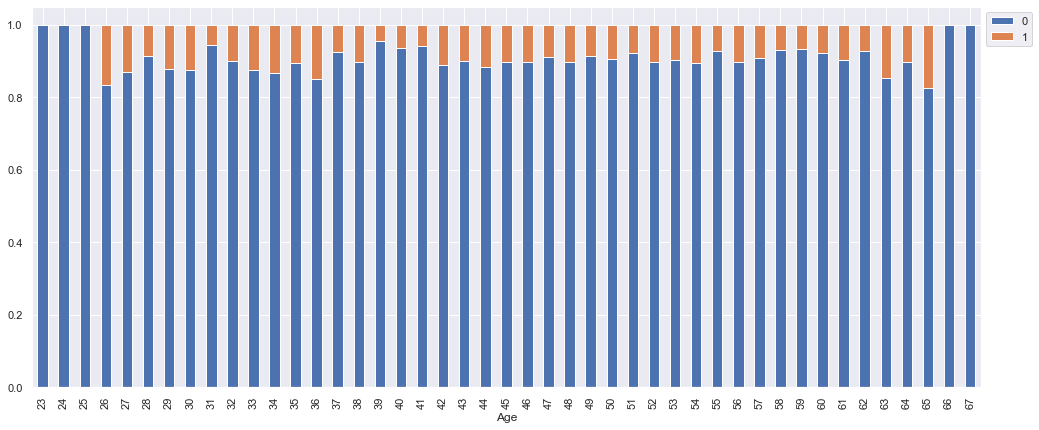

In [40]:
stacked_plot(loanModeldf['Age'])

* People 25 years and below and never taken a personal loan
* More percentage of people 65 years and 26 years have taken personal loan

### Income vs Personal Loan

Personal_Loan     0    1   All
Income                        
8                23    0    23
9                26    0    26
10               23    0    23
11               27    0    27
12               30    0    30
...             ...  ...   ...
204               3    0     3
205               2    0     2
218               1    0     1
224               1    0     1
All            4520  480  5000

[163 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


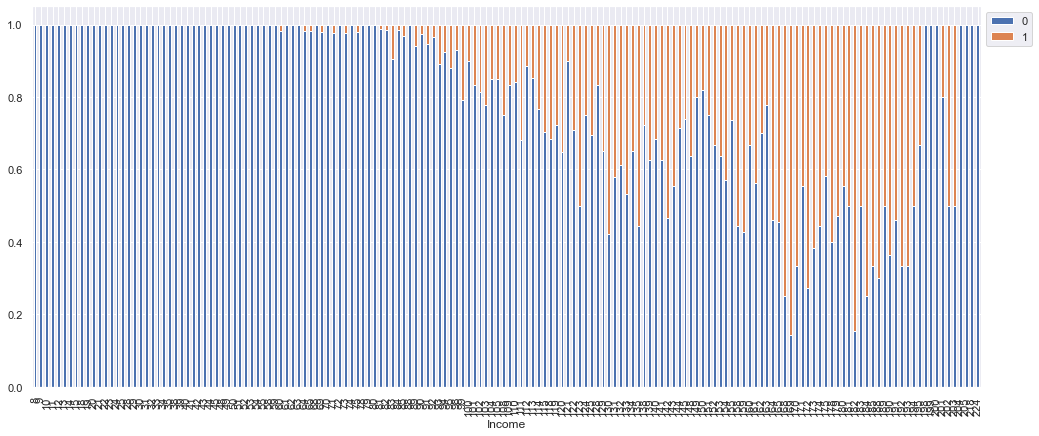

In [43]:
stacked_plot(loanModeldf['Income'])

* Overall higher income people have taken personal loans

### Experience vs Personal Loan

Personal_Loan     0    1   All
Experience                    
0                59    7    66
1                66    8    74
2                76    9    85
3               112   17   129
4               104    9   113
5               132   14   146
6               107   12   119
7               109   12   121
8               101   18   119
9               127   20   147
10              111    7   118
11              103   13   116
12               86   16   102
13              106   11   117
14              121    6   127
15              114    5   119
16              114   13   127
17              114   11   125
18              125   12   137
19              121   14   135
20              131   17   148
21              154   11   165
22              111   13   124
23              131   13   144
24              123    8   131
25              128   14   142
26              120   14   134
27              115   10   125
28              127   11   138
29              112   12   124
30      

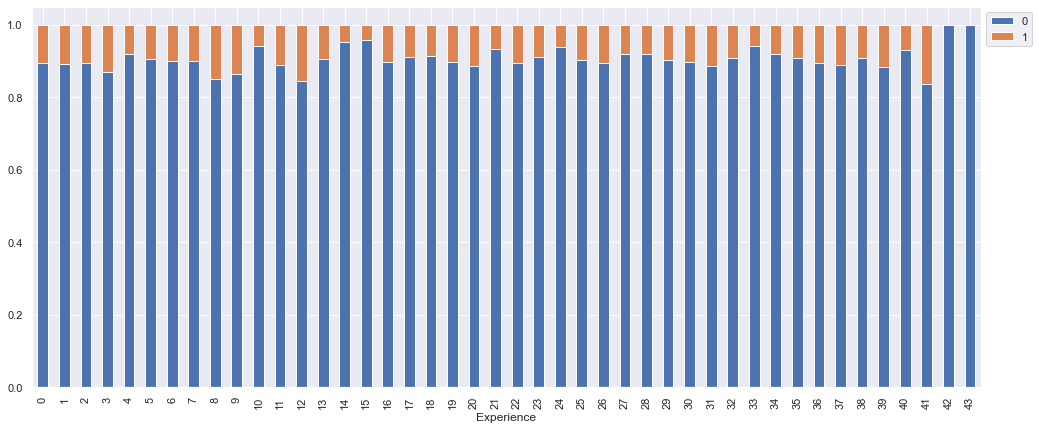

In [44]:
stacked_plot(loanModeldf['Experience'])

* People beyond 42 years of experience have not taken the personal loan.

### CCAvg vs Personal Loan

Personal_Loan     0    1   All
CCAvg                         
0.0             105    1   106
0.1             181    2   183
0.2             196    8   204
0.3             235    6   241
0.4             175    4   179
...             ...  ...   ...
8.9               0    1     1
9.0               0    2     2
9.3               0    1     1
10.0              0    3     3
All            4520  480  5000

[109 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


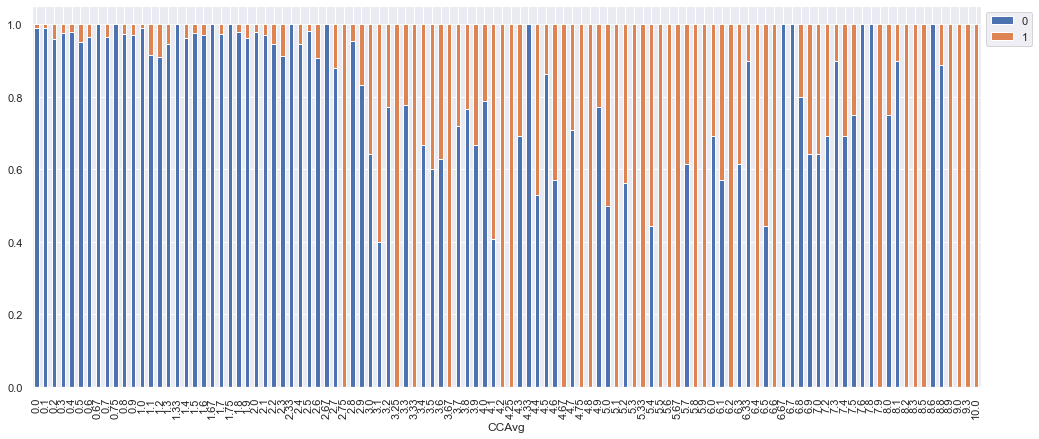

In [46]:
stacked_plot(loanModeldf['CCAvg'])

* In general people with lesser credit card spending have not taken a personal loan

### Securities Account vs Personal Loan

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


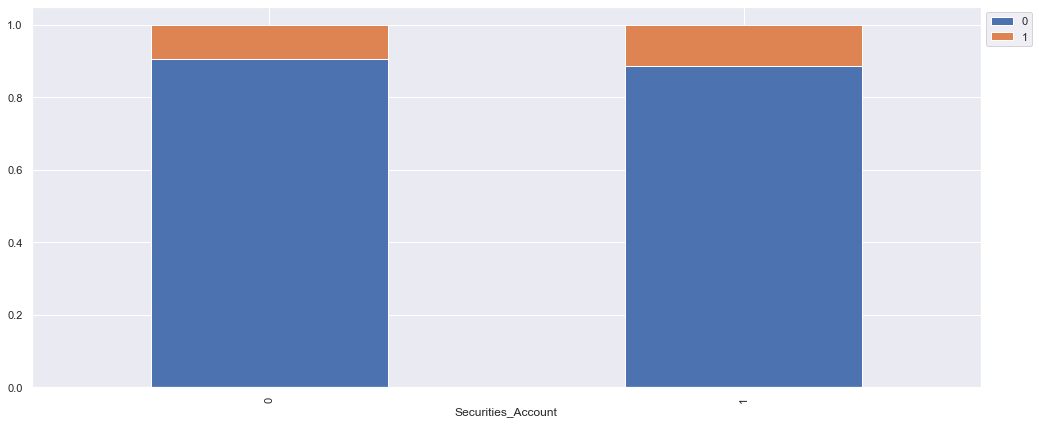

In [48]:
stacked_plot(loanModeldf['Securities_Account'])

* In general people slightly more people having securities account have taken a personal loan

### CD  Account vs Personal Loan

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


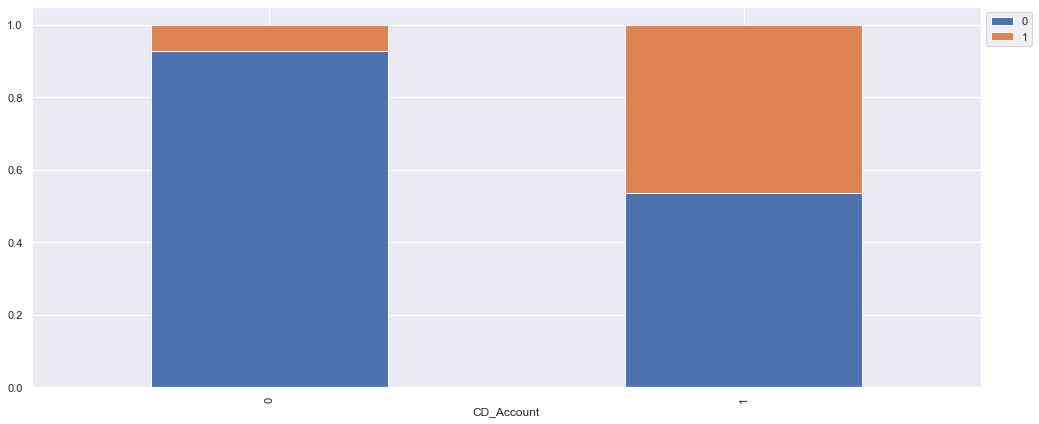

In [50]:
stacked_plot(loanModeldf['CD_Account'])

* More people with CD account have taken personal Loan

### Online vs Personal Loan

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


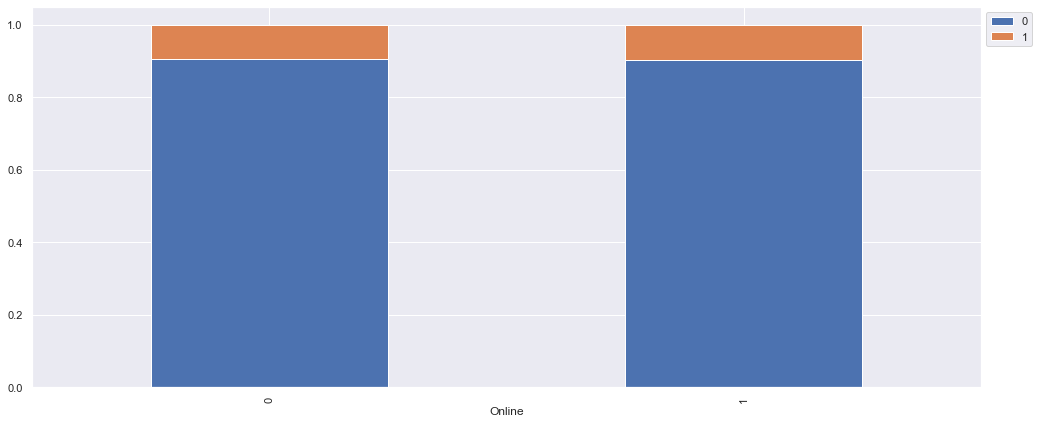

In [51]:
stacked_plot(loanModeldf['Online'])

* Almost equal percentage of people having online experience have taken a personal Loan

### Family vs Personal Loan

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


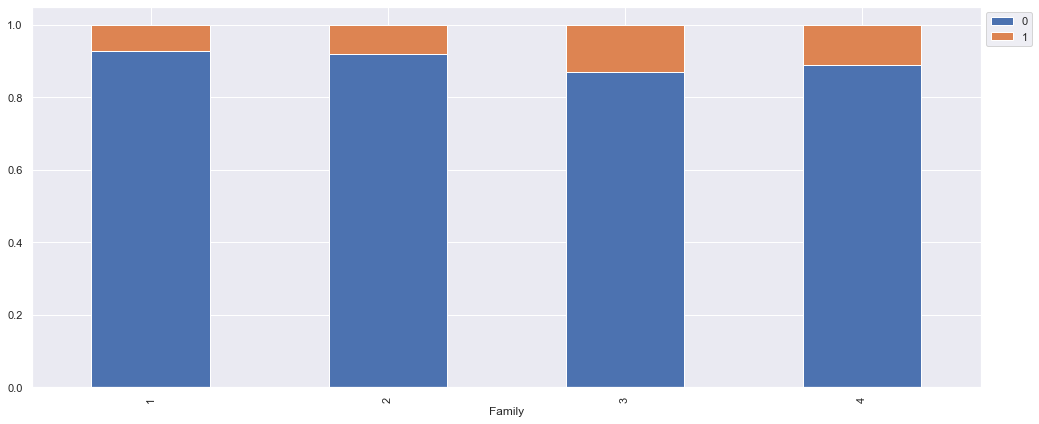

In [52]:
stacked_plot(loanModeldf['Family'])

* In general more family size have taken personal loan

### CreditCard vs Personal Loan

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


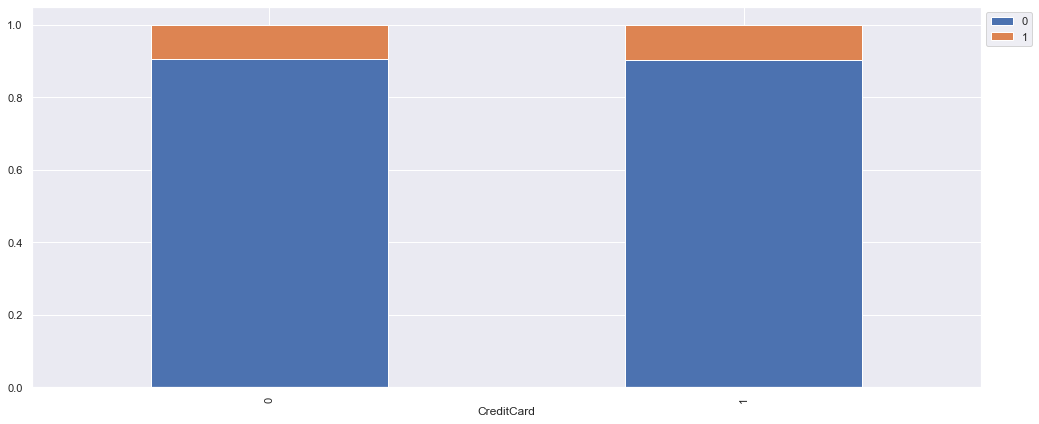

In [53]:
stacked_plot(loanModeldf['CreditCard'])

* Almost equal amount of people having credit card with other company have taken a personal loan.

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

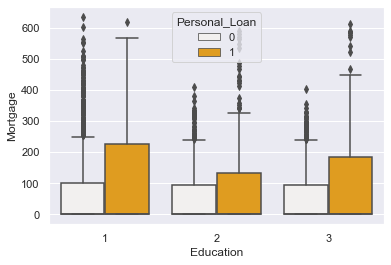

In [61]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal_Loan", data=loanModeldf,color='orange')

* customer who do not have personal loan and customer who has personal loan have high mortgage

<AxesSubplot:xlabel='Family', ylabel='Income'>

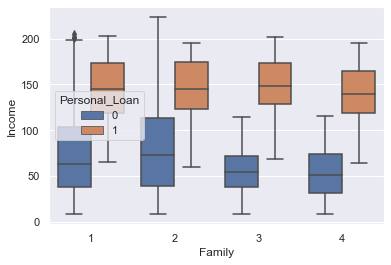

In [60]:
sns.boxplot(x=loanModeldf.Family,y=loanModeldf.Income,hue=loanModeldf.Personal_Loan)

* families with income less than 100K are less likely to take loan,than families with high income

In [49]:
loanModeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### ID column no relation with the Personal loan borrowal so dropping it 

In [62]:
loanModeldf.drop("ID" , axis=1)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [63]:
loanModeldf['Personal_Loan'].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

* Only 480 customers took personal loans and 4520 did not. The ratio of customers taking the personal loan is 11:89.

In [64]:
loanModelLRdf = loanModeldf.copy(deep=True)

## Modelling using Decision Tree

## Split Data

In [65]:
X = loanModeldf.drop("Personal_Loan" , axis=1)
y = loanModeldf.pop("Personal_Loan")

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

## Build Decision Tree Model

In [67]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Scoring our Decision Tree

In [68]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.98


In [70]:
y.sum(axis = 0)

480

* The ratio of positives to negatives is 11:89 almost 1:9, so if our model marks each sample as negative, then also we'll get 90% accuracy, hence accuracy is not a good metric to evaluate here.

**What does a bank want?**
* A bank wants the marketing campaign to put efforts behind customers who have higher chances to take the personal loan  - it can face 2 types of nisleads here: 
   * Whenever bank targets a customer to take a personal loan and the customer does not take it.
   * Whenever bank does not pursue a customer to take a personal loan and the customer could have got it.

**Which scenario has a greater ?**
* Customer not returning the money back.

**Since we don't want marketing campaign to go behind customers having less chance of personal loan we should use Recall as a metric of model evaluation instead of accuracy.**

* Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of dedicating efforts on customers who will not take a loan

In [71]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [72]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

## Confusion Matrix

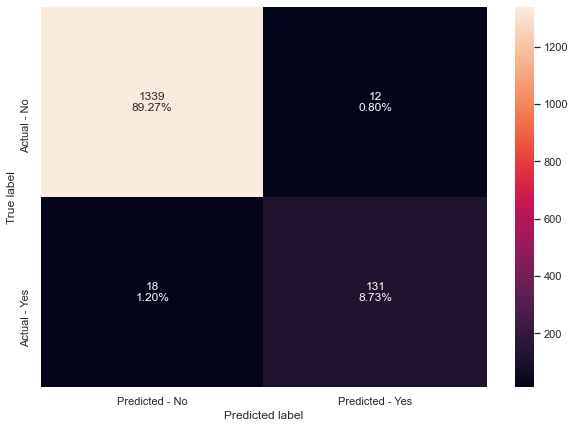

In [73]:
make_confusion_matrix(dTree,y_test)

In [74]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.8791946308724832


## Visualizing the Decision Tree

In [75]:
feature_names = list(X.columns)
print(feature_names)

['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


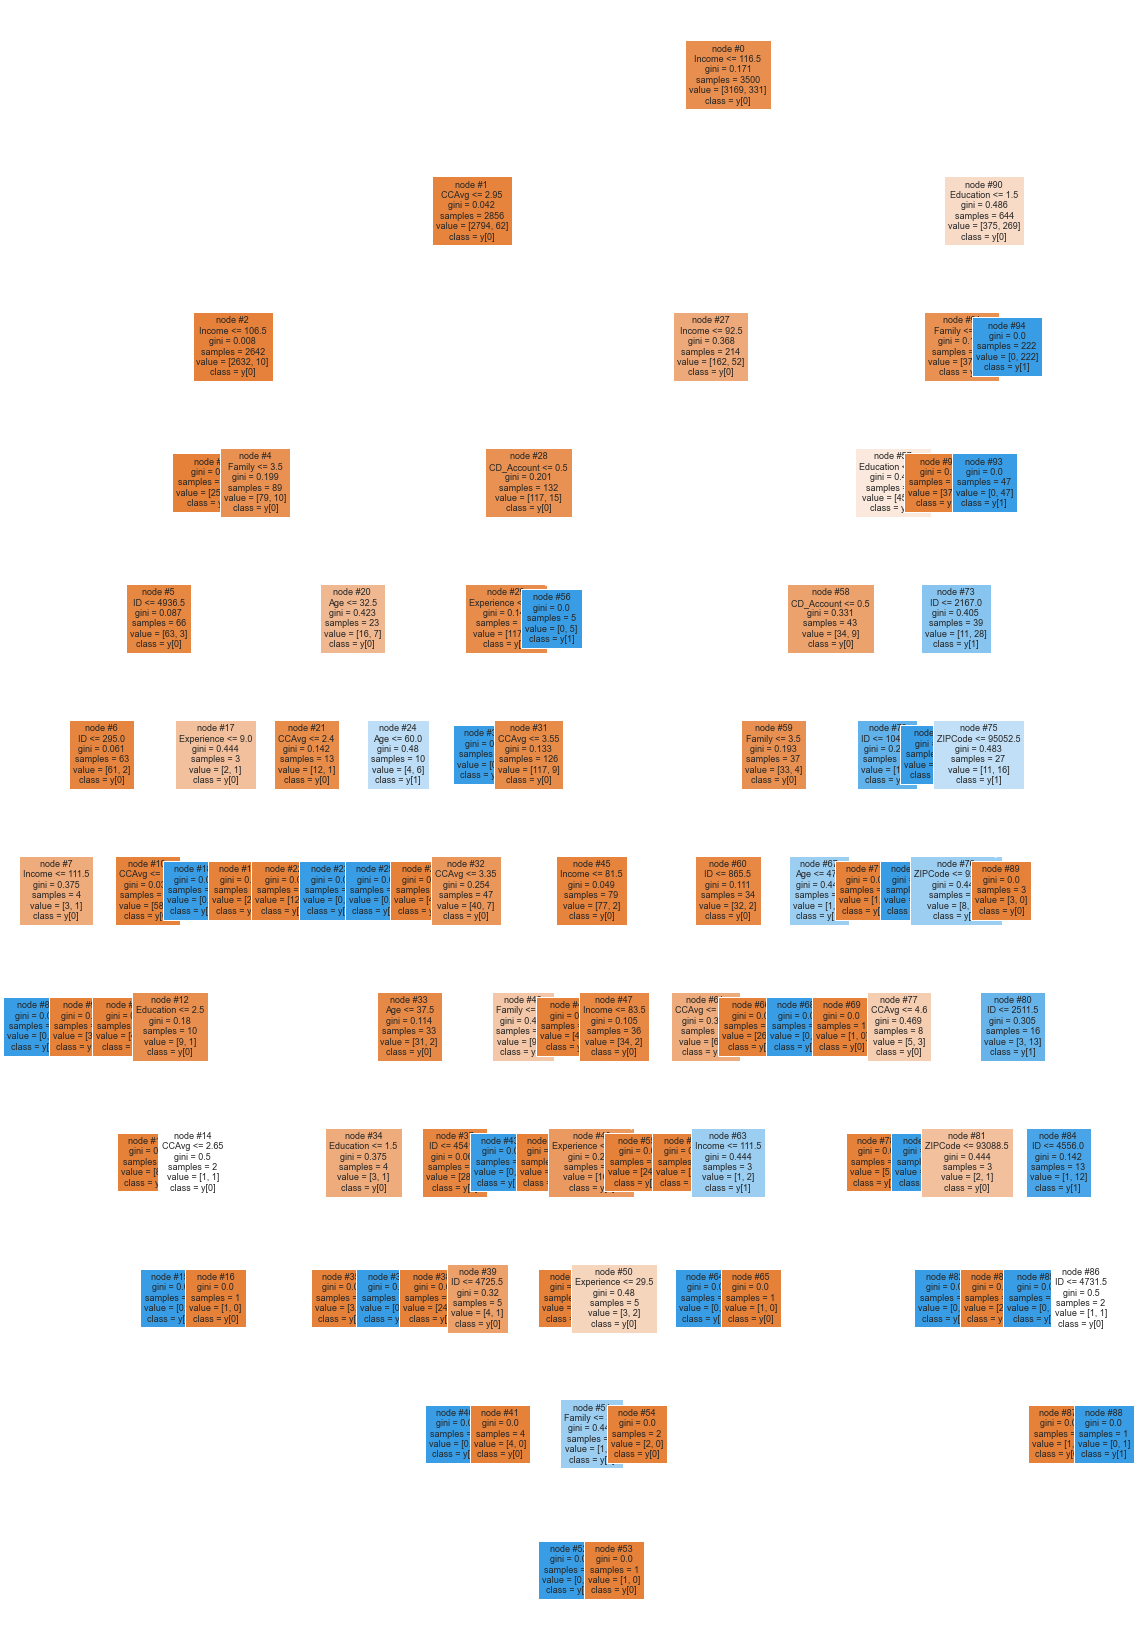

In [175]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [77]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ID <= 4936.50
|   |   |   |   |   |--- ID <= 295.00
|   |   |   |   |   |   |--- Income <= 111.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Income >  111.50
|   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |--- ID >  295.00
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [49.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education >  2.50
|   |   |   |   |   |   |   |   |--- CCAvg <= 2.65
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |--- 

In [78]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.404789
Income              0.303486
Family              0.159522
CCAvg               0.056245
CD_Account          0.022684
ID                  0.019336
Age                 0.015938
ZIPCode             0.009585
Experience          0.008416
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


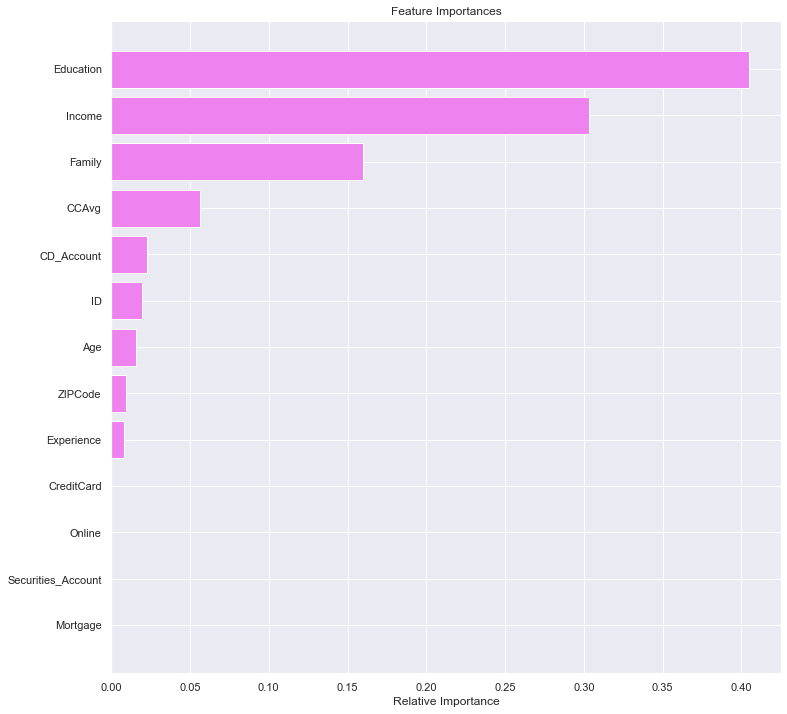

In [79]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* According to the decision tree model, Education is the most important variable for predicting whether the customer will take a personal loan followed by Income.

**The tree above is very complex, such a tree often overfits.**

## Reducing over fitting

* In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits
  and it captures more information about the data and this is one of the root causes of overfitting
* Let's try Limiting the max_depth of tree to 3

In [80]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

## Confusion Matrix - decision tree with depth restricted to 3

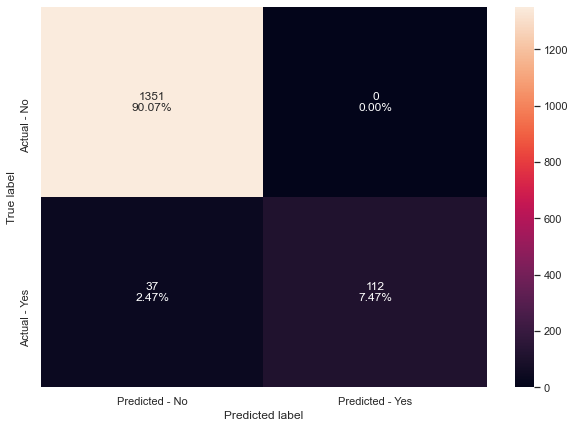

In [81]:
make_confusion_matrix(dTree1, y_test)

In [82]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.9822857142857143
Accuracy on test set :  0.9753333333333334
Recall on training set :  0.8126888217522659
Recall on test set :  0.7516778523489933


* Recall on training set has reduced from 1 to 0.81 but this is an improvement because now the model is not overfitting and we have a generalized model.

## Visualizing the Decision Tree

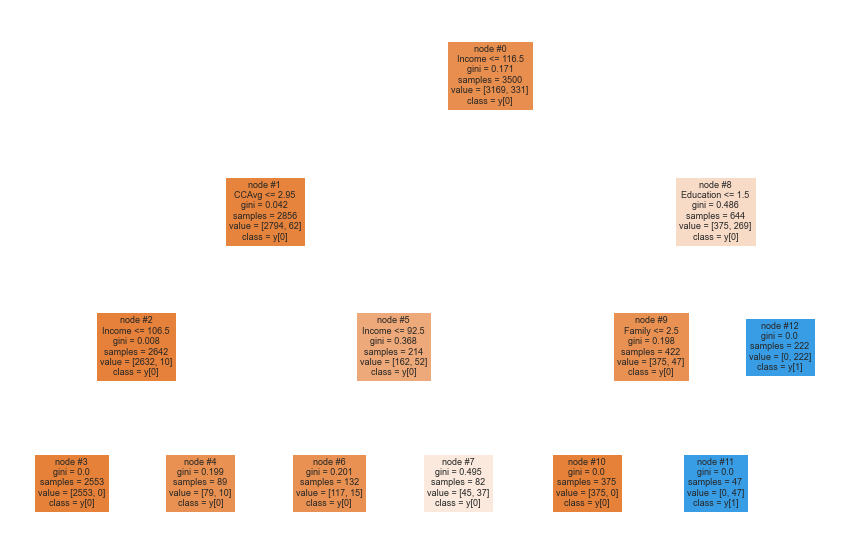

In [83]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [84]:
print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [79.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- weights: [45.00, 37.00] class: 0
|--- Income >  116.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 47.00] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [0.00, 222.00] class: 1



* The tree has become readable now but the recall on test set has not improved and reduced.

In [85]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.446593
Income              0.346997
Family              0.162372
CCAvg               0.044038
ID                  0.000000
Age                 0.000000
Experience          0.000000
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000


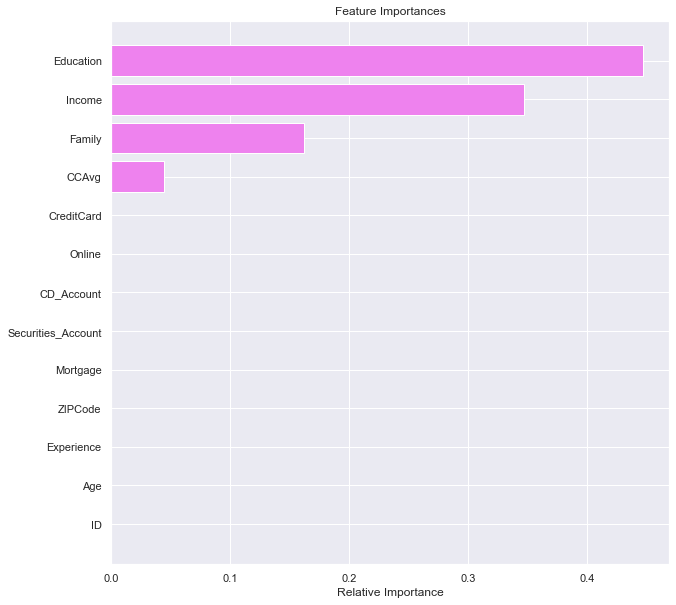

In [86]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Using GridSearch for Hyperparameter tuning of our tree model

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

## Confusion Matrix - decision tree with tuned hyperparameters

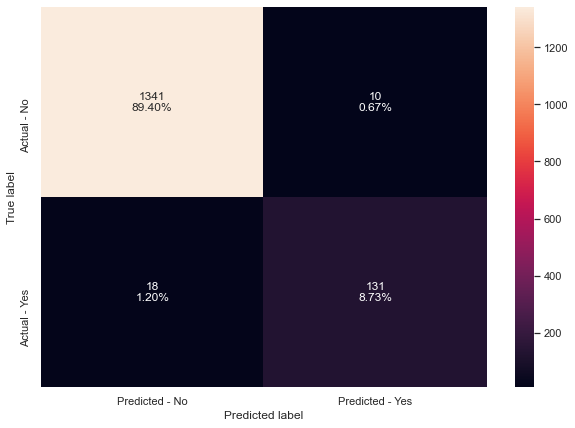

In [89]:
make_confusion_matrix(estimator,y_test)

In [90]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.9897142857142858
Accuracy on test set :  0.9813333333333333
Recall on training set :  0.9274924471299094
Recall on test set :  0.8791946308724832


* Recall has improved for both train and test set after hyperparameter tuning.

## Visualizing the Decision Tree

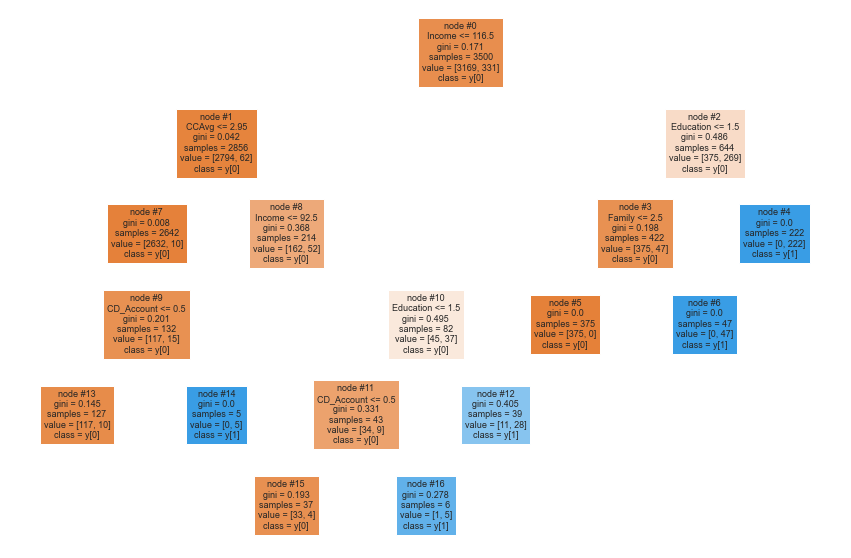

In [91]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [92]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|   |   |   |--- Education >  1.50
|   |   |   |   |--- weights: [11.00, 28.00] class: 1
|--- Income >  116.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 47.00] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [0.00, 222.00] class: 1



In [93]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                         Imp
Education           0.447999
Income              0.328713
Family              0.155711
CCAvg               0.042231
CD_Account          0.025345
ID                  0.000000
Age                 0.000000
Experience          0.000000
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


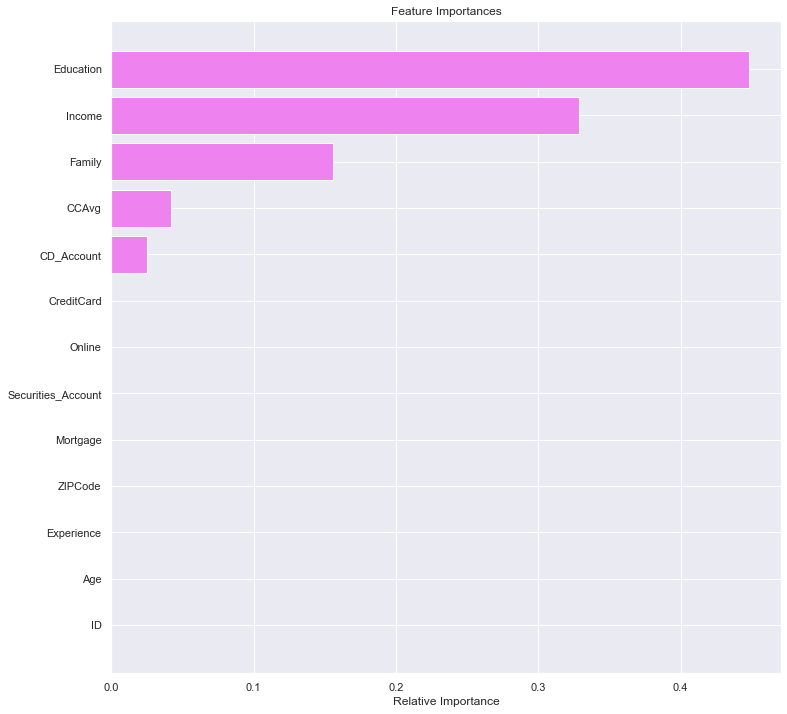

In [94]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Post pruning might give even better results, since there is quite a good possibility that we might neglect some hyperparameters, post pruning will take care of all that.

## Cost Complexity Pruning


The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [95]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [96]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000187,0.000562
2,0.000223,0.001676
3,0.000264,0.002203
4,0.000268,0.003277
5,0.000269,0.004351
6,0.000359,0.005427
7,0.000381,0.005808
8,0.000381,0.006189
9,0.000476,0.006665


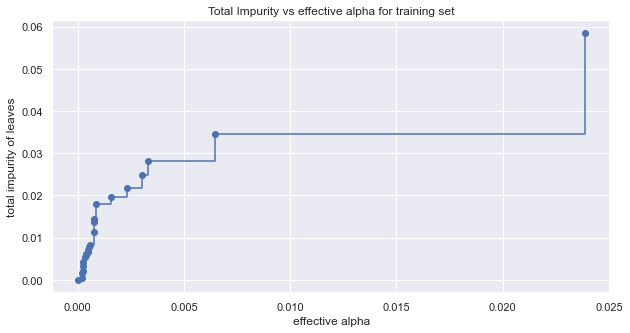

In [97]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [98]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

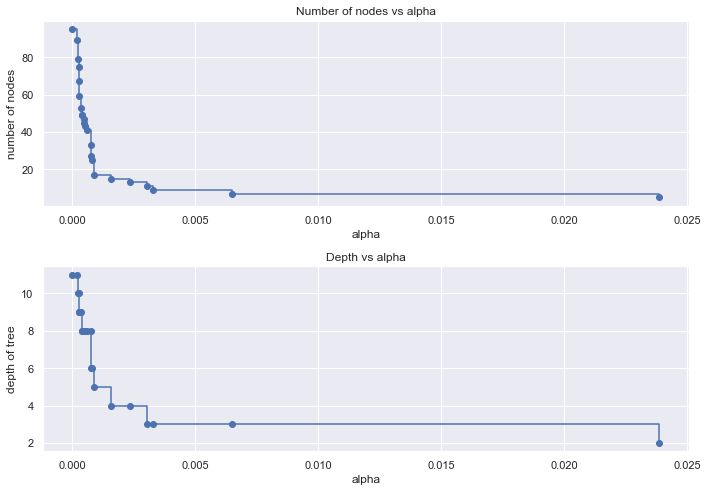

In [99]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Accuracy vs alpha for training and testing sets
----------------------------------------------------
When ``ccp_alpha`` is set to zero and keeping the other default parameters
of `DecisionTreeClassifier`, the tree overfits. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.

In [100]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

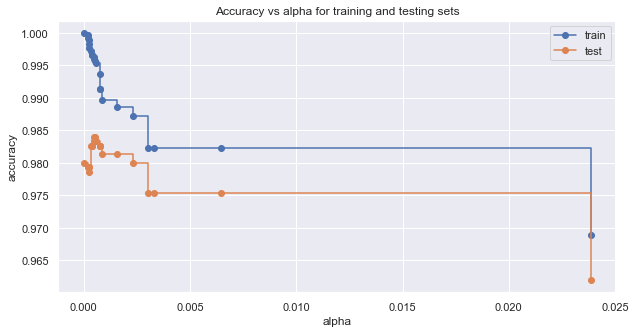

In [101]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [102]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.00048443223443223483, random_state=1)
Training accuracy of best model:  0.996
Test accuracy of best model:  0.984


#### Since accuracy isn't the right metric for our data we would want high recall

In [103]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [104]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

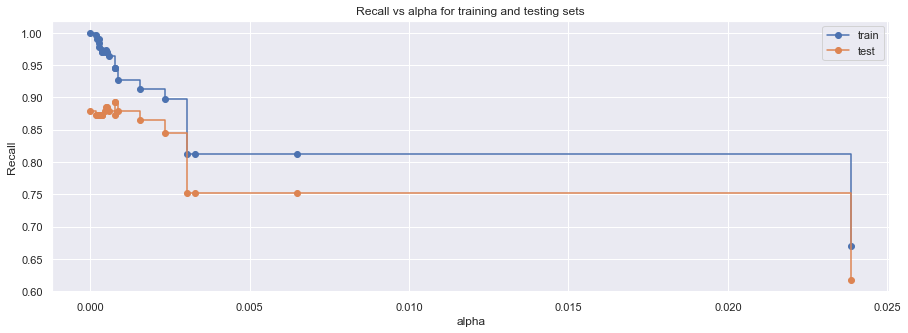

In [105]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [106]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.000777336860670194, random_state=1)


## Confusion Matrix - post-pruned decision tree

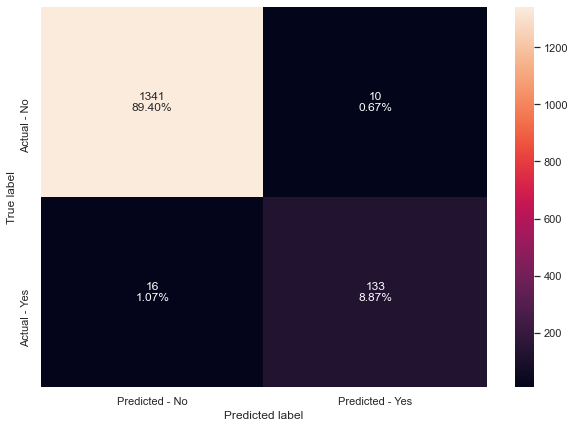

In [107]:
make_confusion_matrix(best_model,y_test)

In [108]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  0.945619335347432
Recall on test set :  0.8926174496644296


## Visualizing the Decision Tree

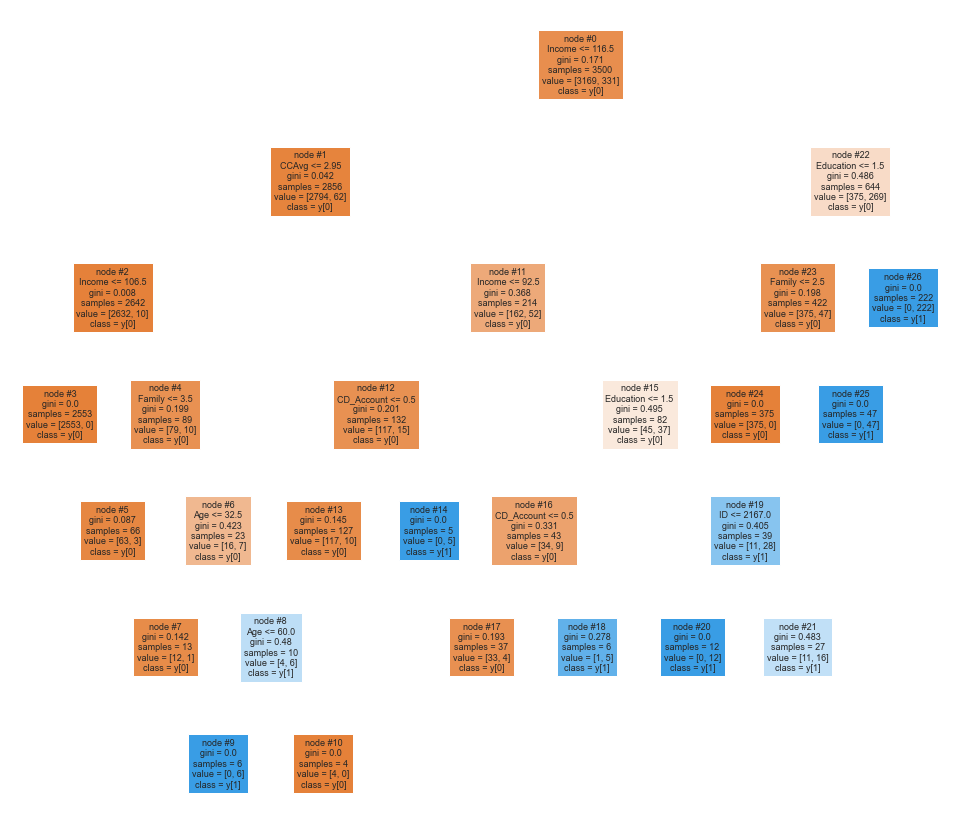

In [109]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [110]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- weights: [12.00, 1.00] class: 0
|   |   |   |   |--- Age >  32.50
|   |   |   |   |   |--- Age <= 60.00
|   |   |   |   |   |   |--- weights: [0.00, 6.00] class: 1
|   |   |   |   |   |--- Age >  60.00
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   | 

In [111]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.435727
Income              0.323646
Family              0.155591
CCAvg               0.041074
CD_Account          0.024651
Age                 0.014310
ID                  0.005000
Experience          0.000000
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


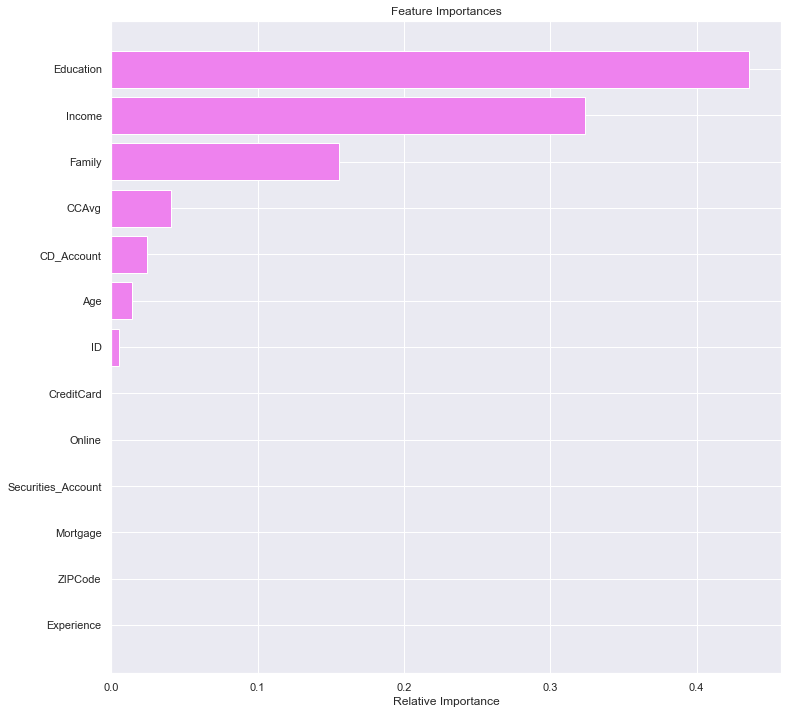

In [112]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Education, Income and Loan are the most important features.

In [113]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[1,0.81,0.93,0.95], 'Test_Recall':[0.88,0.75,0.88,0.89]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.00,0.88
1,Decision tree with restricted maximum depth,0.81,0.75
2,Decision treee with hyperparameter tuning,0.93,0.88
3,Decision tree with post-pruning,0.95,0.89


**Decision tree with post-pruning is giving the highest recall on test set.**

### Data Pre-Processing

* There are many outliers in the data which we will treat (perform capping of outliers).
* All the values smaller than the lower whisker will be assigned the value of the lower whisker, and all the values above the upper whisker will be assigned the value of the upper whisker.

In [118]:
loanModelLRdf.drop("ID" , axis=1, inplace=True)

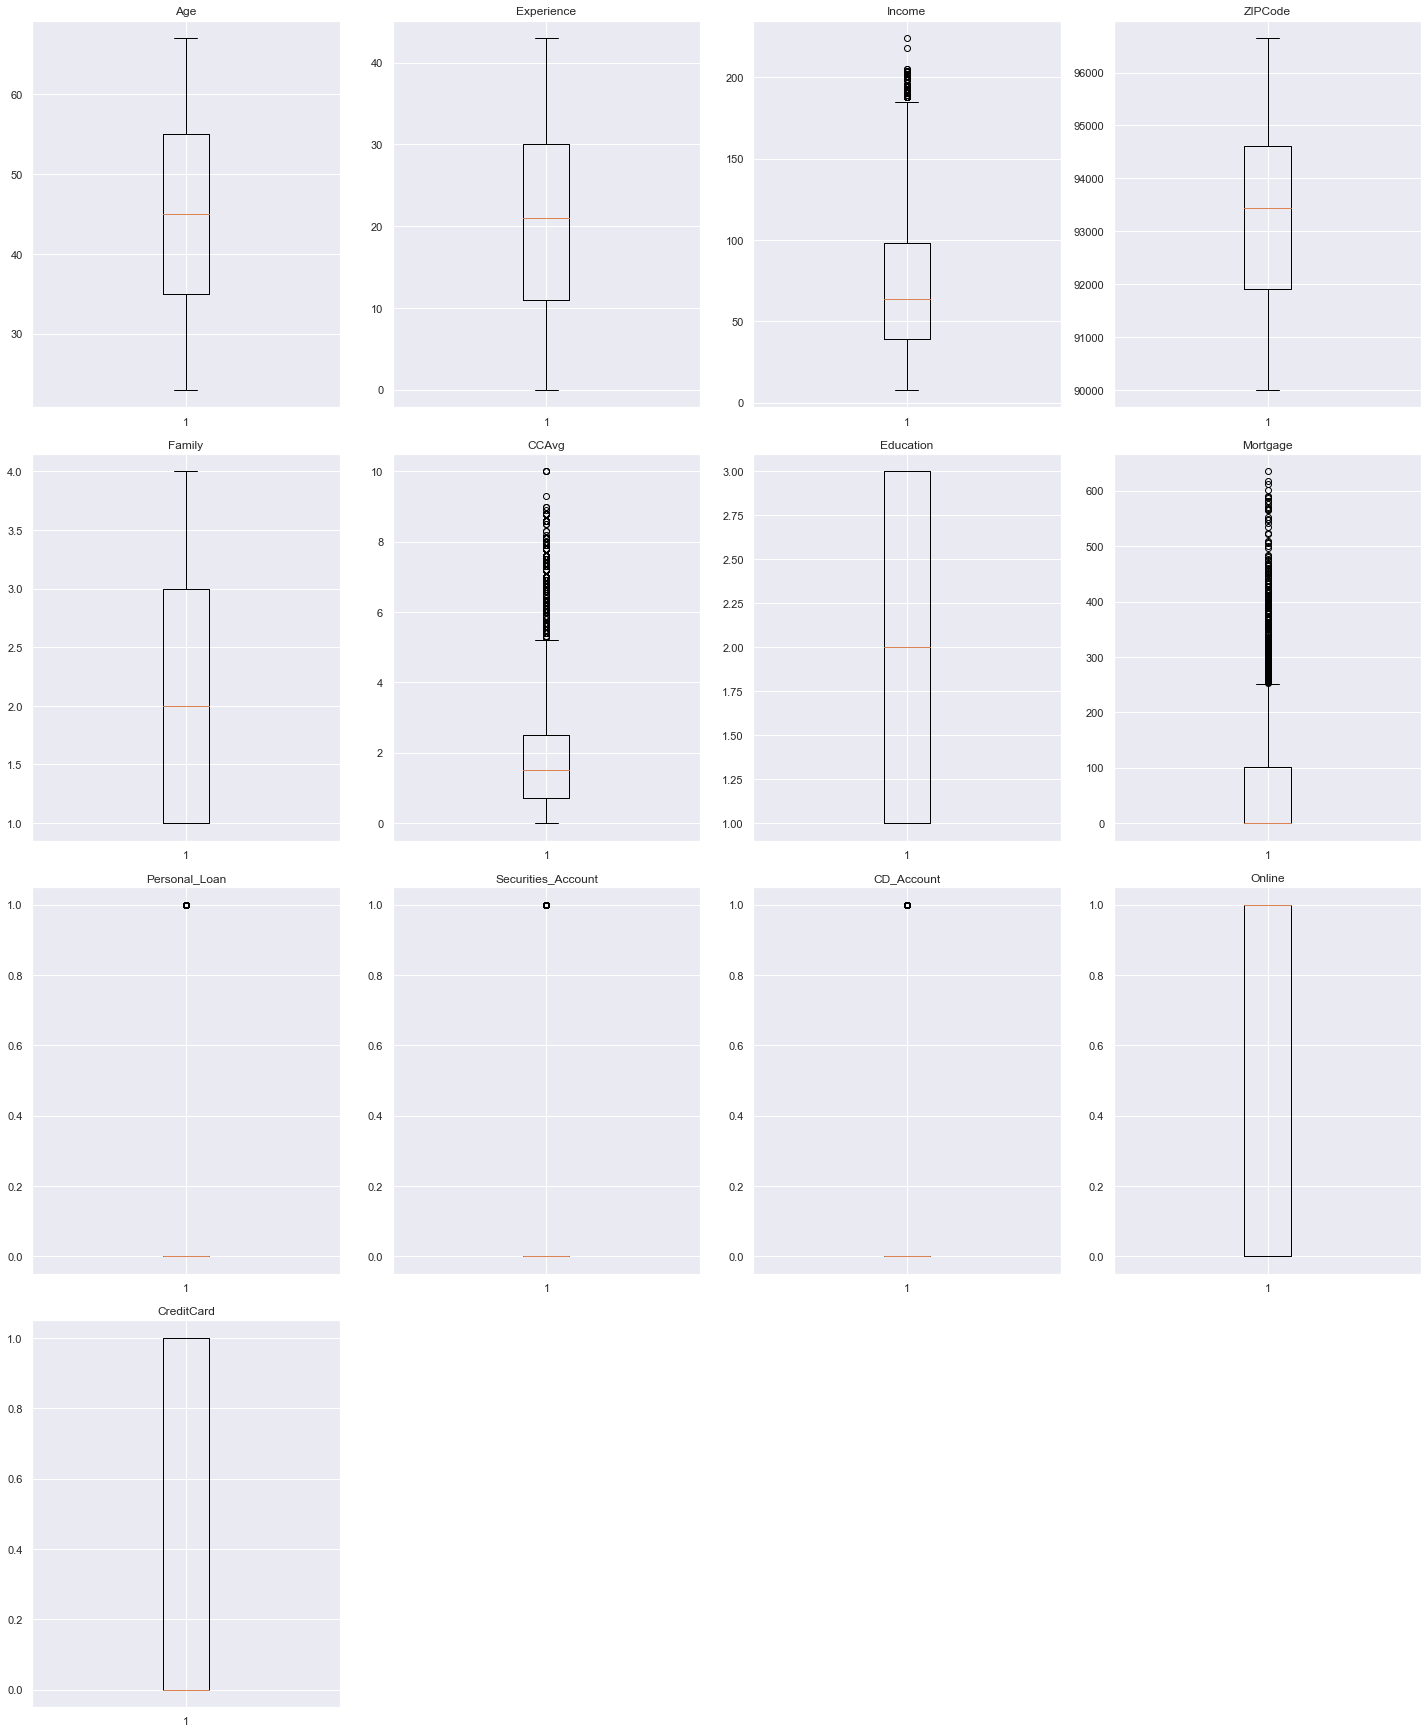

In [119]:
# outlier detection using boxplot
numerical_col = loanModelLRdf.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(loanModelLRdf[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

* Income, mortgage, and ccavg have outliers

### Treating Outliers

In [120]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whisker will be assigned value of upper_Whisker 
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    data: data frame
    '''
    for c in col_list:
        data = treat_outliers(data,c)
        
    return data

In [121]:
numerical_col = loanModelLRdf.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

  
# items to be removed 
treating= {'CCAvg', 'Mortgage', 'Income'} # these column have very few non zero observation , doing outlier treatment would remove those observation so we are keeping it as it is
  
numerical_col = [ele for ele in numerical_col if ele in treating] 
loanModelLRdf = treat_outliers_all(loanModelLRdf,numerical_col)

## Modelling using Logistic regression

### Data Split

In [122]:
X = loanModelLRdf.drop(['Personal_Loan'], axis=1)
Y = loanModelLRdf['Personal_Loan']


#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=1)

In [124]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [142]:
def make_confusion_matrix(model,test_X,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Building the model

**What does a bank want?**
* A bank wants the marketing campaign to put efforts behind customers who have higher chances to take the personal loan  - it can face 2 types of nisleads here: 
   * Whenever bank targets a customer to take a personal loan and the customer does not take it.
   * Whenever bank does not pursue a customer to take a personal loan and the customer could have got it.

**Which scenario has a greater ?**
* Both the cases are important as:

* Targeted Customer not taking the Personal Loan

* Persons who can take the personal loan not getting targeted


**Since we don't want marketing campaign to go behind customers having less chance of personal loan we should use Recall as a metric of model evaluation instead of accuracy.**

### How to reduce this loss i.e need to reduce False Negatives?
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

**First, let's create two functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

Accuracy on training set :  0.9074285714285715
Accuracy on test set :  0.9086666666666666
Recall on training set :  0.3293051359516616
Recall on test set :  0.3221476510067114
Precision on training set :  0.5165876777251185
Precision on test set :  0.5714285714285714
F1 on training set :  0.4022140221402214
F1 on test set :  0.41201716738197425


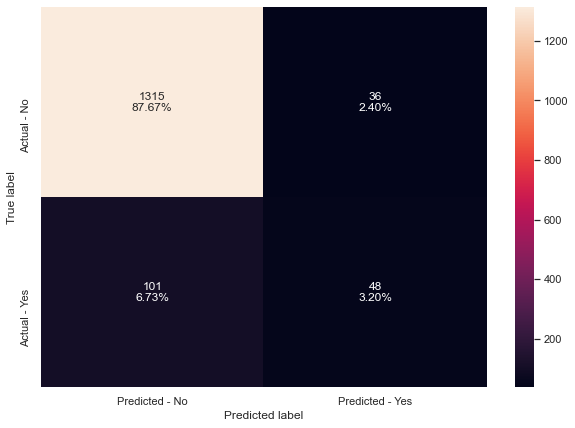

In [143]:
model = LogisticRegression(random_state=1)
lg = model.fit(X_train,y_train)

# creating confusion matrix
make_confusion_matrix(lg,X_test,y_test)

# checking model performance
scores_LR = get_metrics_score(lg,X_train,X_test,y_train,y_test,flag=True)

#### ROC-AUC

* ROC-AUC on training set

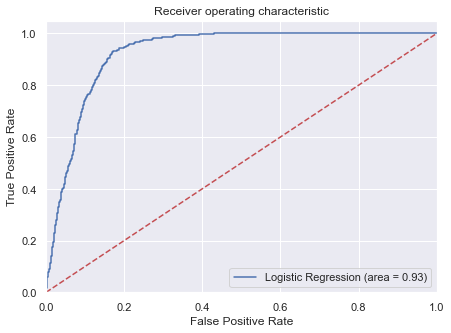

In [127]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

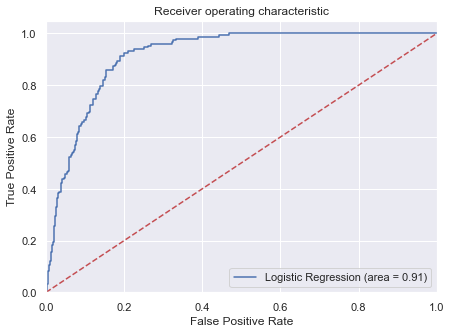

In [128]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a generalized performance on training and test set.

### Finding the coefficients

In [129]:
log_odds = lg.coef_[0]
pd.options.display.float_format = '{:.5f}'.format
pd.DataFrame(log_odds, X_train.columns, columns=['coef']).T

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
coef,-0.00043,-0.00059,0.03813,-0.00007,0.00021,0.00103,0.00026,0.00114,0.00001,0.00015,0.00001,0.00001


### Coefficient interpretations

* Coefficient of Income, Family, CCAvg ,Education ,Mortgage , Securities Account, CD Account Online and Credit Card are positive , increase in these will lead to increase in chances of a person  taking the loan  
* Coefficient of Age, Experience, ZipCode are negative, education, etc increase in these will lead to decrease in chances of a person  taking a personal loan.

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

* Odds from coefficients

In [131]:
odds = np.exp(lg.coef_[0]) # converting coefficients to odds
pd.set_option('display.max_columns',None)  # removing limit from number of columns to display
pd.DataFrame(odds, X_train.columns, columns=['odds']).T # adding the odds to a dataframe

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
odds,0.99957,0.99941,1.03887,0.99993,1.00021,1.00103,1.00026,1.00114,1.00001,1.00015,1.00001,1.00001


In [132]:
perc_change_odds = (np.exp(lg.coef_[0])-1)*100 # finding the percentage change
pd.set_option('display.max_columns',None) # removing limit from number of columns to display
pd.DataFrame(perc_change_odds, X_train.columns, columns=['change_odds%']).T # adding the change_odds% to a dataframe

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
change_odds%,-0.04274,-0.05899,3.88666,-0.00678,0.02062,0.10297,0.02619,0.11430,0.00107,0.01544,0.00125,0.00057


* Percentage change in odds

### Coefficient interpretations

* `age`: Holding all other features constant a 1 unit change in Age will decrease the odds of a person not taking the loan by 0.042%
* `Experience`: Holding all other features constant a 1 unit change in the Experience will decrease the odds of a person not taking the loan  by 0.05%.
* `Income`: Holding all other features constant a 1 unit change in the capital_gain will increase the odds of a person not taking the loan by 3.88%
* `ZipCode`: Holding all other features constant a 1 unit change in the ZipCode will decrease the odds of a person not taking the loan by -.00678%
* `Family`: Holding all other features constant a 1 unit change in the family will increase the odds of a person not taking the loan  by 0.02%
* `CCAvg`: Holding all other features constant a 1 unit change in the family will increase the odds of a person not taking the loan by 0.102%
* `Education`: Holding all other features constant a 1 unit change in the family will increase the odds of a person not taking the loan by 0.02%%
* `Mortgage`: Holding all other features constant a 1 unit change in the family will increase the odds of a person not taking the loan by 0.11%
* `Securities Account`: Holding all other features constant a 1 unit change in the Securities Account will increase the odds of a person not taking the loan by 0.001%
* `CD Account`: Holding all other features constant a 1 unit change in the Securities Account will increase the odds of a person not taking the loan by 0.015%
* `Online`: Holding all other features constant a 1 unit change in the Online will increase the odds of a person not taking the loan by 0.015%
* `Credit`: Holding all other features constant a 1 unit change in the Securities Account will increase the odds of a person not taking the loan by 0.005%


### Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

In [145]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.0687567749896347


In [146]:
# Model prediction with optimal threshold

pred_train_opt = (lg.predict_proba(X_train)[:,1]>optimal_threshold)
pred_test_opt = (lg.predict_proba(X_test)[:,1]>optimal_threshold)

train_acc = accuracy_score(y_train, pred_train_opt)
test_acc  = accuracy_score(y_test, pred_test_opt)

print('Accuracy on train data:',train_acc)
print('Accuracy on test data:',test_acc)

train_rec = recall_score(y_train, pred_train_opt)
test_rec  = recall_score(y_test, pred_test_opt)

print('Recall on train data:',train_rec)
print('Recall on test data:',test_rec)

train_prec = precision_score(y_train, pred_train_opt)
test_prec  = precision_score(y_test, pred_test_opt)

print('Precision on train data:',train_prec)
print('Precision on test data:',test_prec)

train_f1 = f1_score(y_train, pred_train_opt)
test_f1  = f1_score(y_test, pred_test_opt)

print('F1 Score on train data:',train_f1)
print('F1 Score on test data:',test_f1)

train_roc = roc_auc_score(y_train, pred_train_opt)
test_roc  = roc_auc_score(y_test, pred_test_opt)

print('ROC-AUC Score on train data:',train_roc)
print('ROC-AUC Score on test data:',test_roc)

scores_optimal = []
scores_optimal.extend((train_acc,test_acc,train_rec,test_rec,train_prec,test_prec,train_f1,test_f1))

Accuracy on train data: 0.8268571428571428
Accuracy on test data: 0.8113333333333334
Recall on train data: 0.9365558912386707
Recall on test data: 0.9194630872483222
Precision on train data: 0.3463687150837989
Precision on test data: 0.33578431372549017
F1 Score on train data: 0.5057096247960848
F1 Score on test data: 0.49192100538599637
ROC-AUC Score on train data: 0.8759775353952899
ROC-AUC Score on test data: 0.8594354666441463


F1 score on both training and testing data has increased

#### Let's use Precision-Recall curve and see if we can find a better threshold

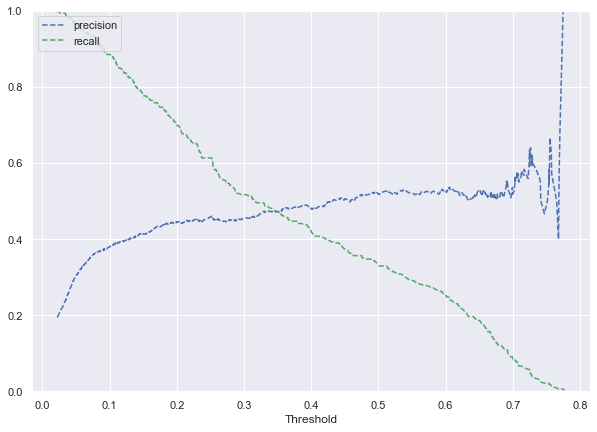

In [147]:
y_scores=lg.predict_proba(X_train)[:,1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.35, we get balanced recall and precision.

In [ ]:
y_scores=lg.predict_proba(X_train)[:,1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [148]:
optimal_threshold = 0.35

# Model prediction with optimal threshold
pred_train_opt = (lg.predict_proba(X_train)[:,1]>optimal_threshold)
pred_test_opt = (lg.predict_proba(X_test)[:,1]>optimal_threshold)

#Model performance with optimal threhold

train_acc1 = accuracy_score(y_train, pred_train_opt)
test_acc1  = accuracy_score(y_test, pred_test_opt)

print('Accuracy on train data:',train_acc1)
print('Accuracy on test data:',test_acc1)

train_rec1 = recall_score(y_train, pred_train_opt)
test_rec1  = recall_score(y_test, pred_test_opt)

print('Recall on train data:',train_rec1)
print('Recall on test data:',test_rec1)

train_prec1 = precision_score(y_train, pred_train_opt)
test_prec1  = precision_score(y_test, pred_test_opt)

print('Precision on train data:',train_prec1)
print('Precision on test data:',test_prec1)

train_f1_1 = f1_score(y_train, pred_train_opt)
test_f1_1  = f1_score(y_test, pred_test_opt)

print('F1 Score on train data:',train_f1_1)
print('F1 Score on test data:',test_f1_1)

train_roc1 = roc_auc_score(y_train, pred_train_opt)
test_roc1  = roc_auc_score(y_test, pred_test_opt)

print('ROC-AUC Score on train data:',train_roc1)
print('ROC-AUC Score on test data:',test_roc1)

scores_prec_recall = []
scores_prec_recall.extend((train_acc1,test_acc1,train_rec1,test_rec1,train_prec1,test_prec1,train_f1_1,test_f1_1))

Accuracy on train data: 0.9002857142857142
Accuracy on test data: 0.898
Recall on train data: 0.47129909365558914
Recall on test data: 0.4563758389261745
Precision on train data: 0.4727272727272727
Precision on test data: 0.4857142857142857
F1 Score on train data: 0.4720121028744327
F1 Score on test data: 0.4705882352941176
ROC-AUC Score on train data: 0.7081960914791042
ROC-AUC Score on test data: 0.7015409912617548


* F1 score decreased slighlty

In [152]:
#!pip install mlxtend 

### Sequential Feature Selector

#### Selecting subset of important features using Sequential Feature Selector method

**Why we should do feature selection?**

- Reduces dimensionality.
- Discards deceptive features (Deceptive features appear to aid learning on the training set, but impair generalization).
- Speeds training/testing.

In [149]:
# Sequential feature selector is present in mlxtend library
# !pip install mlxtend to install mlxtent library

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [153]:
#from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver='newton-cg',n_jobs=-1,random_state=1,max_iter=100)

In [154]:
X_train.shape

(3500, 12)

In [156]:
# we will first build model with all varaible
sfs = SFS(model, k_features=12, forward=True, floating=False, scoring='f1', verbose=2, cv=3,n_jobs=-1)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    8.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    8.4s finished

[2021-06-19 00:35:07] Features: 1/12 -- score: 0.41343889085824576[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    1.3s finished

[2021-06-19 00:35:08] Features: 2/12 -- score: 0.6437527159212849[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.4s finished

[2021-06-19 00:35:09] Features: 3/12 -- score: 0.6920154589897836[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    1.3s finished

[2021-06-19 00:35:11] Features: 4/12 -- score: 0.7

In [ ]:
* We can see that performance increases till the 10th feature and then decreases.

In [160]:
sfs1 = SFS(model, k_features=10, forward=True, floating=False, scoring='f1', verbose=2, cv=3,n_jobs=-1)

sfs1 = sfs1.fit(X_train, y_train)

#fig1 = plot_sfs(sfs1.get_metric_dict(),kind='std_dev',figsize=(10,5))

#plt.ylim([0.8, 1])
#plt.title('Sequential Forward Selection (w. StdDev)')
#plt.grid()
#plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.5s finished

[2021-06-19 00:40:11] Features: 1/10 -- score: 0.41343889085824576[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    1.2s finished

[2021-06-19 00:40:13] Features: 2/10 -- score: 0.6437527159212849[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.4s finished

[2021-06-19 00:40:14] Features: 3/10 -- score: 0.6920154589897836[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    1.5s finished

[2021-06-19 00:40:16] Features: 4/10 -- score: 0.7

* Finding which features are important?

In [161]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 2, 4, 5, 6, 7, 8, 9, 10, 11]


* Let's look at best 5 variables

In [162]:
X_train.columns[feat_cols]

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities_Account', 'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [163]:
X_train_final = X_train[X_train.columns[feat_cols]]

#Creating new x_test with the same variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

In [164]:
#Fitting logistic regession model

logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000 
# max_iter indicates number of iteration needed to converge

logreg.fit(X_train_final, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

### Let's Look at model performance

Accuracy on training set :  0.9577142857142857
Accuracy on test set :  0.9506666666666667
Recall on training set :  0.6737160120845922
Recall on test set :  0.610738255033557
Precision on training set :  0.8479087452471483
Precision on test set :  0.8504672897196262
F1 on training set :  0.7508417508417509
F1 on test set :  0.7109375000000001


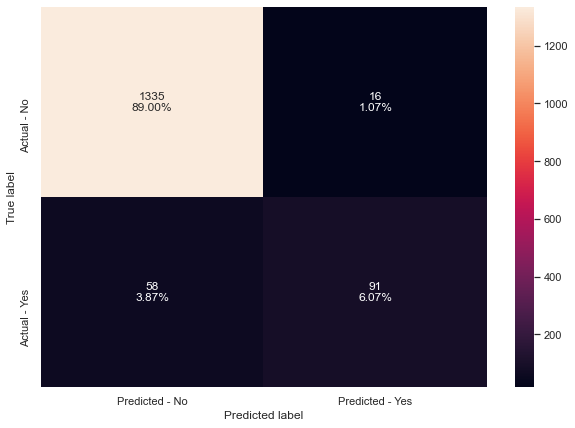

In [165]:
scores_LR = get_metrics_score(logreg,X_train_final,X_test_final,y_train,y_test,flag=True)

# creating confusion matrix
make_confusion_matrix(logreg,X_test_final,y_test)

* Model is giving a generalized performance on training and test set.
* F1 score is much better with fewer features

In [169]:
# defining list of model
models = [lg]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [170]:
# defining list of model
models = [logreg]

# looping through all the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score(model,X_train_final,X_test_final,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [171]:
# getting the scores of model with optimal threshold of 0.58 to get the metrics score - Accuracy, Recall, Precision, and F1 score
acc_train.append(scores_optimal[0])
acc_test.append(scores_optimal[1])
recall_train.append(scores_optimal[2])
recall_test.append(scores_optimal[3])
precision_train.append(scores_optimal[4])
precision_test.append(scores_optimal[5])
f1_train.append(scores_optimal[6])
f1_test.append(scores_optimal[7])

# getting the scores of model with optimal threshold of 0.71 to get the metrics score - Accuracy, Recall, Precision, and F1 score
acc_train.append(scores_prec_recall[0])
acc_test.append(scores_prec_recall[1])
recall_train.append(scores_prec_recall[2])
recall_test.append(scores_prec_recall[3])
precision_train.append(scores_prec_recall[4])
precision_test.append(scores_prec_recall[5])
f1_train.append(scores_prec_recall[6])
f1_test.append(scores_prec_recall[7])

In [173]:
comparison_frame = pd.DataFrame({'Model':['Initial Logistic Regression Model with sklearn',
                                          'SFS - Logitic Regression Model (10 variables)',
                                          'Logistic Regression - Optimal threshold = 0.068',
                                          'Logistic Regression - Optimal threshold = 0 .35'],
                                          'Train_Accuracy':acc_train, 
                                          'Test_Accuracy':acc_test,
                                          'Train Recall':recall_train,
                                          'Test Recall':recall_test, 
                                          'Train Precision':precision_train,
                                          'Test Precision':precision_test,
                                          'Train F1':f1_train,
                                          'Test F1':f1_test
                                })
                                    

comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,Initial Logistic Regression Model with sklearn,0.90743,0.90867,0.32931,0.32215,0.51659,0.57143,0.40221,0.41202
1,SFS - Logitic Regression Model (10 variables),0.95771,0.95067,0.67372,0.61074,0.84791,0.85047,0.75084,0.71094
2,Logistic Regression - Optimal threshold = 0.068,0.82686,0.81133,0.93656,0.91946,0.34637,0.33578,0.50571,0.49192
3,Logistic Regression - Optimal threshold = 0 .35,0.90029,0.89800,0.47130,0.45638,0.47273,0.48571,0.47201,0.47059


### Conclusion
- We have been able to build a predictive model that can be used by the bank to find the customers not taking the personal account with an f1_score of 0.75 on the training set and formulate the marketing campaign.
- We found that Age, Income, family, education, CCAvg, Mortgage, Securities Account, CD Account are predictors of cusotmer taking a personal loan
-  Coefficient of Income, family, CCAvg ,Education ,Mortgage, Securities Account, CD Account online and credit  are positive, increase in these will lead to an increase in chances of a person not taking the Personal loan. 
- Coefficient of Age, Experience, ZipCode  are negative, education, etc increase in these will lead to decrease in chances of a person not taking the loan



### Comparison between decision Tree and Logistic Regression

The Recall using decision tree is way higher 0.95 on training and 0.89 on testing than best performing logical regression model. 
Decision Tree algorithm is better performing than Logistic regression.

### Recommendations

- The bank should target higher Income individuals who have higher chances of taking a personal loan. 
- The bank should target higher Education level individuals who have higher chances of taking a personal loan. 
- The bank should target people with higher spending on credit cards per month.
- The bank should target people with CD account.
- The bank should target people with family size of 3 or 4.